In [1]:
import matplotlib.pyplot as plt
import json

with open('Data/2022-06-01_to_2022-06-15.json') as file:
    data = json.load(file)

In [2]:
def is_float(f):
    try:
        float(f)
        return True
    except:
        return False

print("Hourly Quantities:\n")
hourly_quantities = [k for k, i in data['data']['weather'][0]['hourly'][0].items() if is_float(i)]
print(hourly_quantities)
print('\n---\n')
print("Daily Quantities:\n")
transposed_data = {k: [float(day[k]) for day in  data['data']['weather']] for k, i in data['data']['weather'][0].items() if is_float(i)}
print(list(transposed_data.keys()))

Hourly Quantities:

['time', 'tempC', 'tempF', 'windspeedMiles', 'windspeedKmph', 'winddirDegree', 'weatherCode', 'precipMM', 'precipInches', 'humidity', 'visibility', 'visibilityMiles', 'pressure', 'pressureInches', 'cloudcover', 'HeatIndexC', 'HeatIndexF', 'DewPointC', 'DewPointF', 'WindChillC', 'WindChillF', 'WindGustMiles', 'WindGustKmph', 'FeelsLikeC', 'FeelsLikeF', 'uvIndex']

---

Daily Quantities:

['maxtempC', 'maxtempF', 'mintempC', 'mintempF', 'avgtempC', 'avgtempF', 'totalSnow_cm', 'sunHour', 'uvIndex']


In [3]:
def plot_hourly(quantity_name: str, nrows=3, ncols=5, figsize=(25, 15)):
    qs = list()
    
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    fig.suptitle(quantity_name.title(), fontsize=50)
    
    for i, (ax, day) in enumerate(zip(axes.flatten(), data['data']['weather'])):
        
        quantity = [float(h[quantity_name]) for h in day['hourly']]
        time = [int(h['time'])//100  for h in day['hourly']]
        
        ax.plot(time, quantity)
        ax.set_title(f"Day {i}")
        
        qs.append(quantity)
        
    average_quantity = list(map(lambda quantity: sum(quantity)/len(quantity), list(zip(*qs))))
    all_time_quantity = [q for quantity in qs for q in quantity]
    
    plt.figure(figsize=(figsize[0], 7))
    plt.title("A Average Day")
    plt.plot(time, average_quantity)
    plt.show()

    plt.figure(figsize=(figsize[0], 7))
    plt.title("All 15 Days joint *vertically")
    plt.plot(all_time_quantity)
    plt.show()

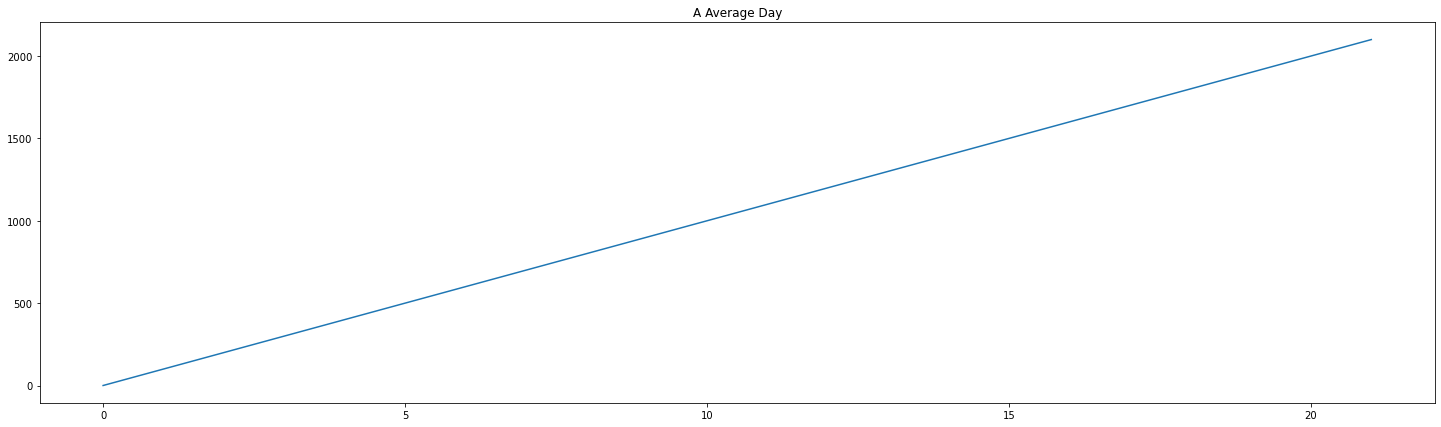


---



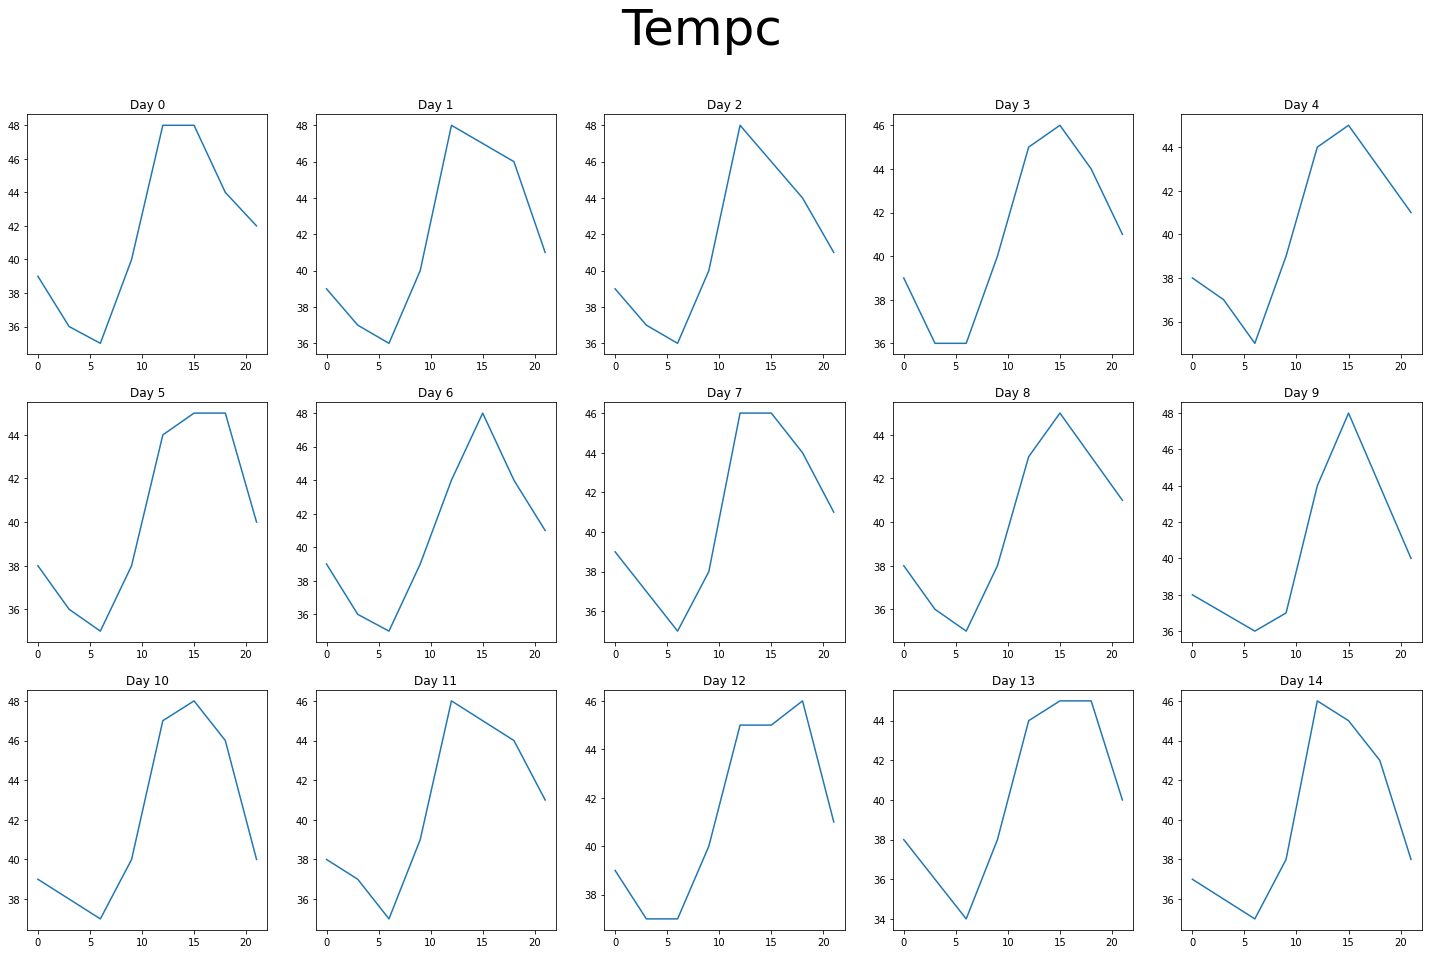

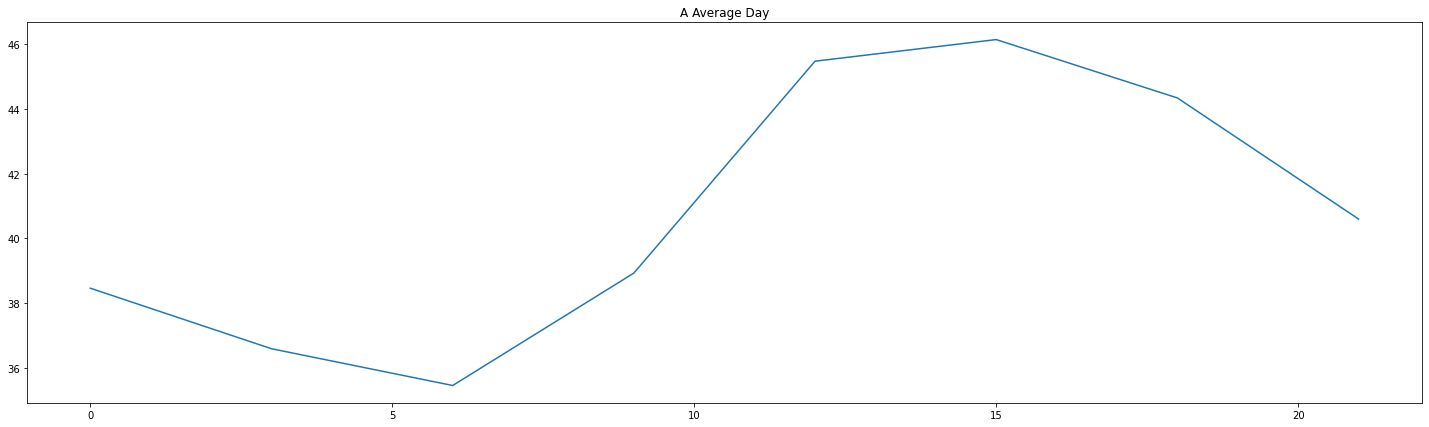


---



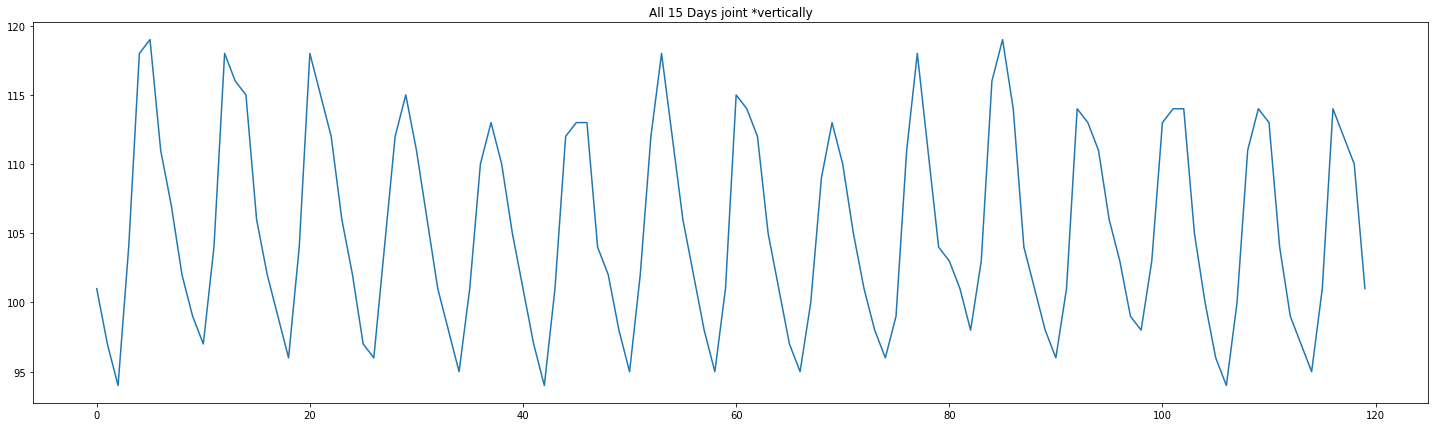


---



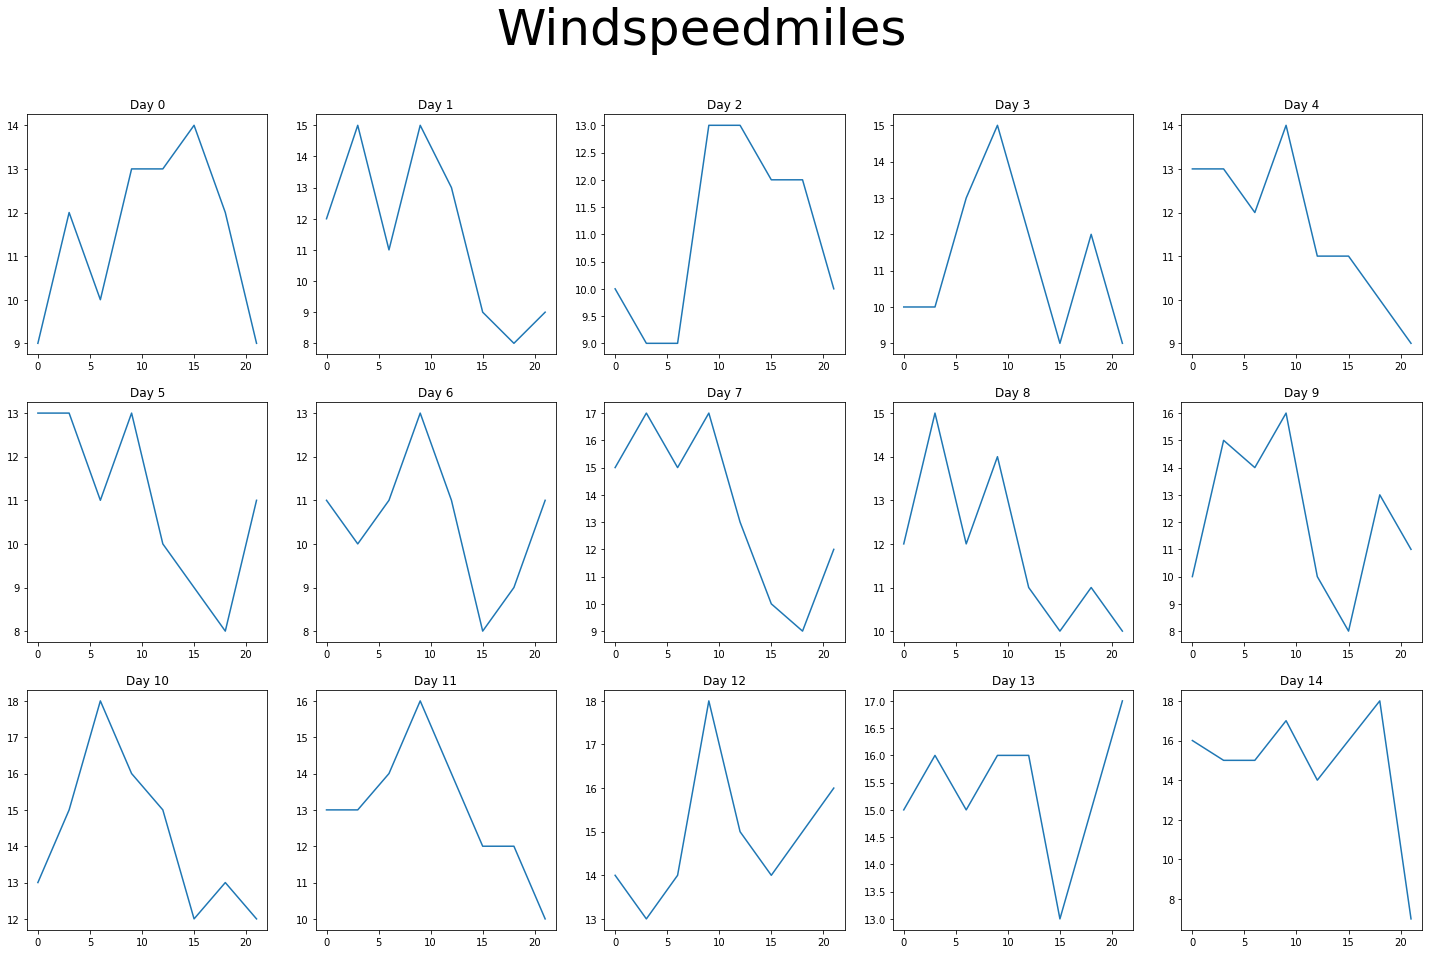

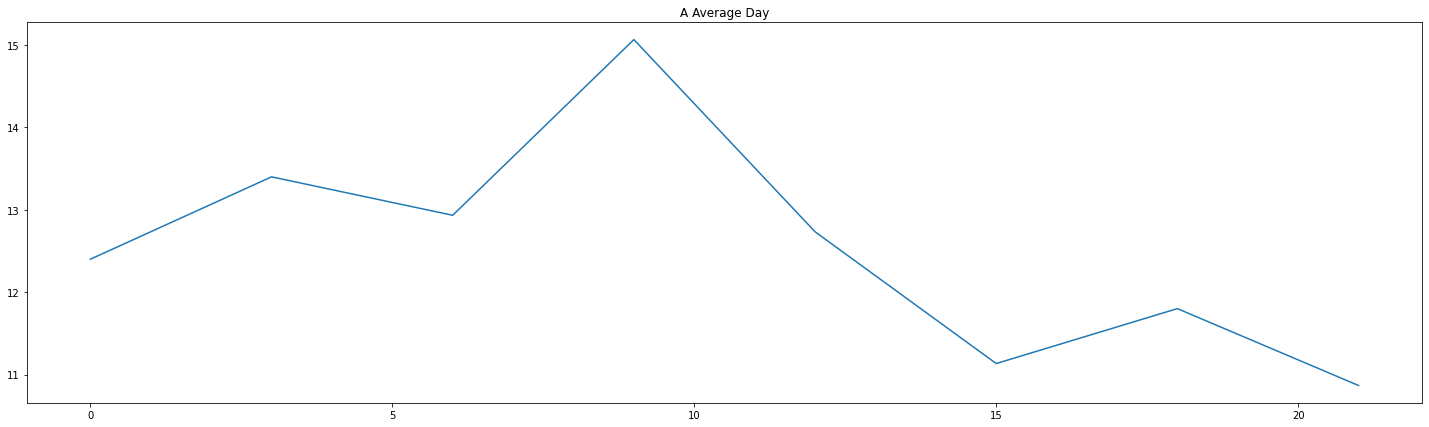

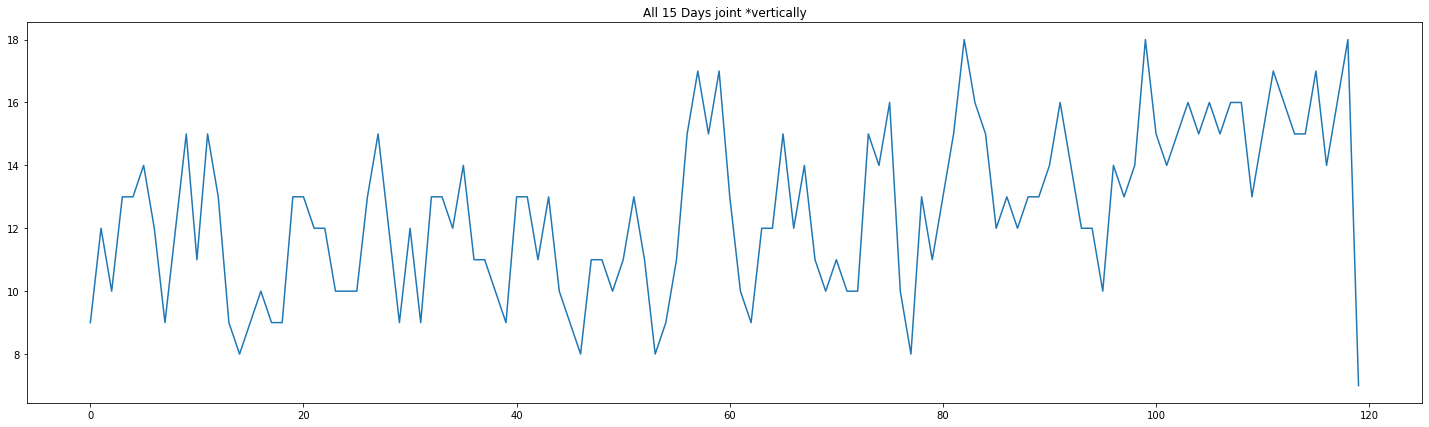


---



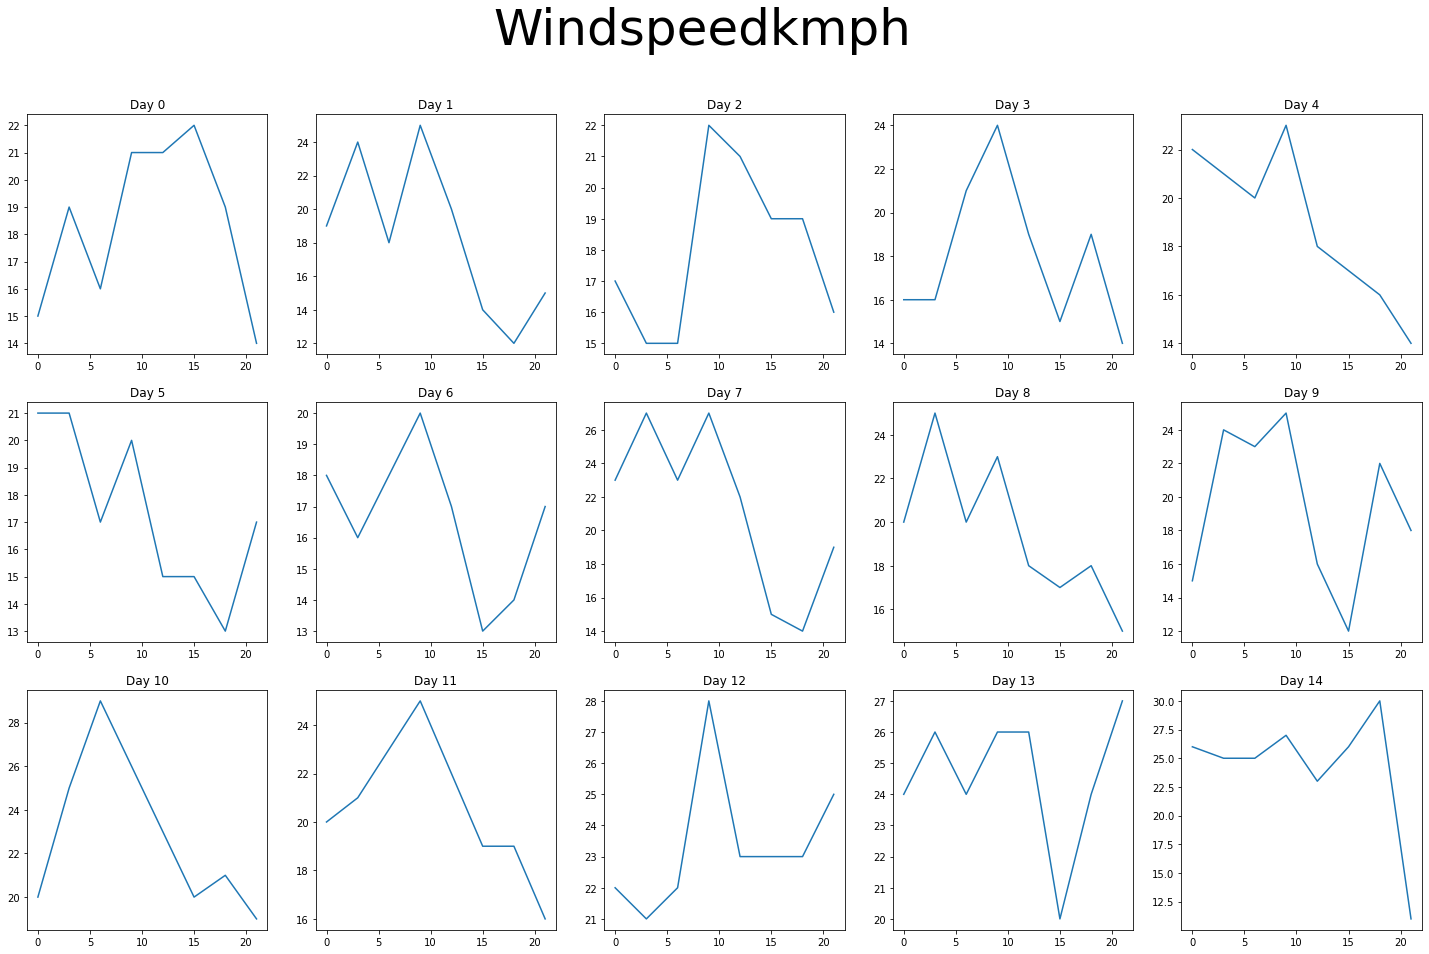

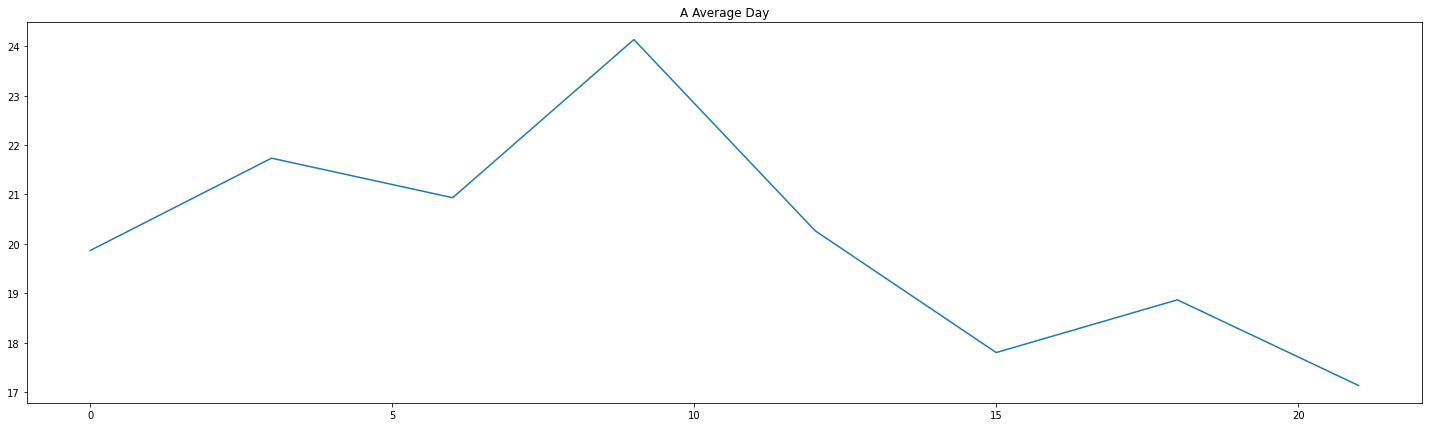

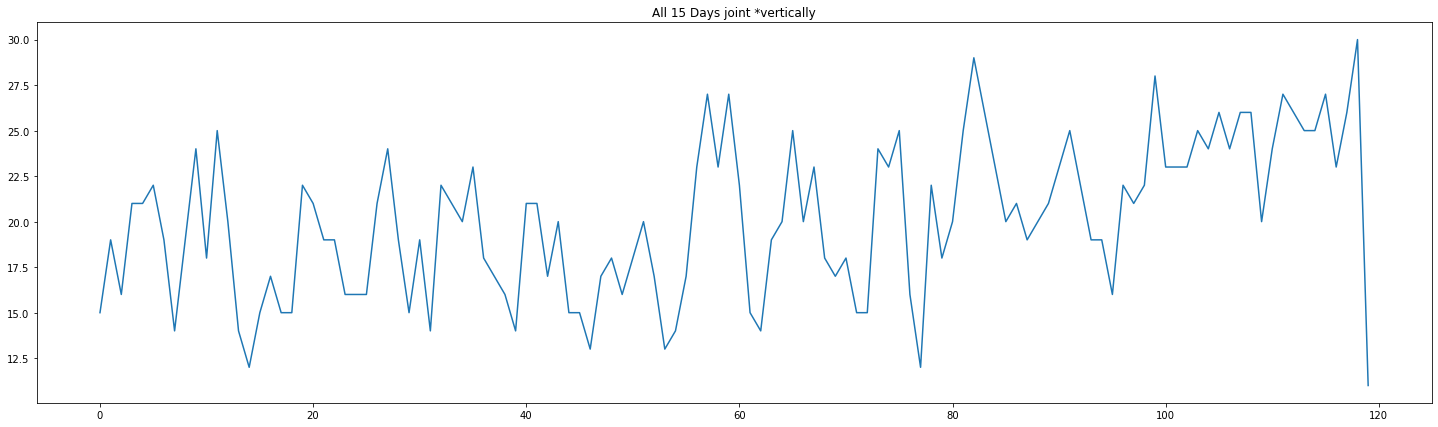


---



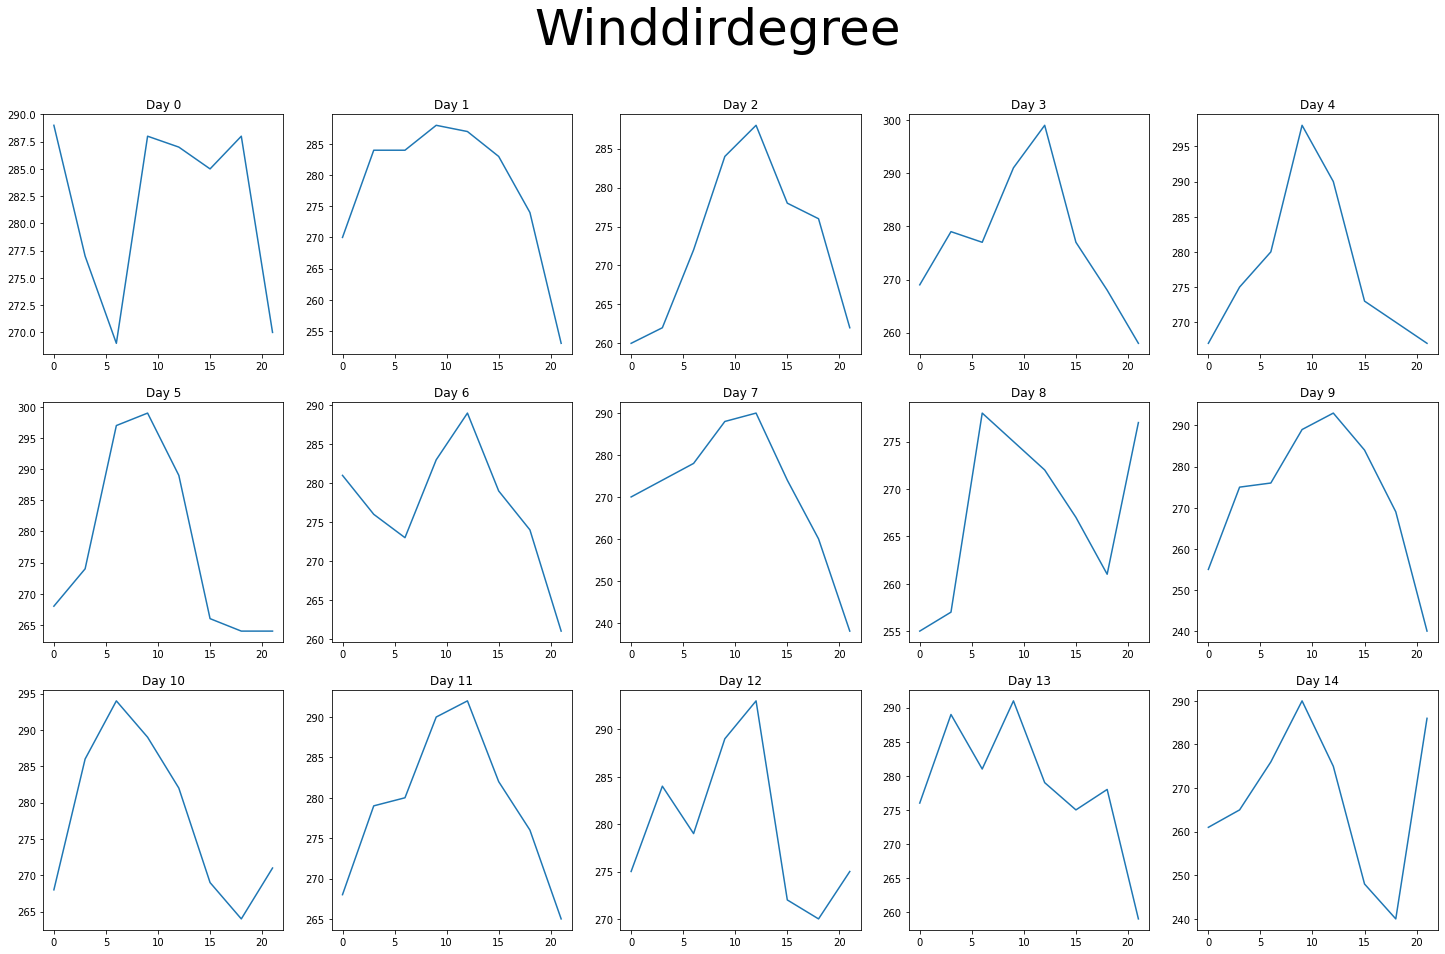

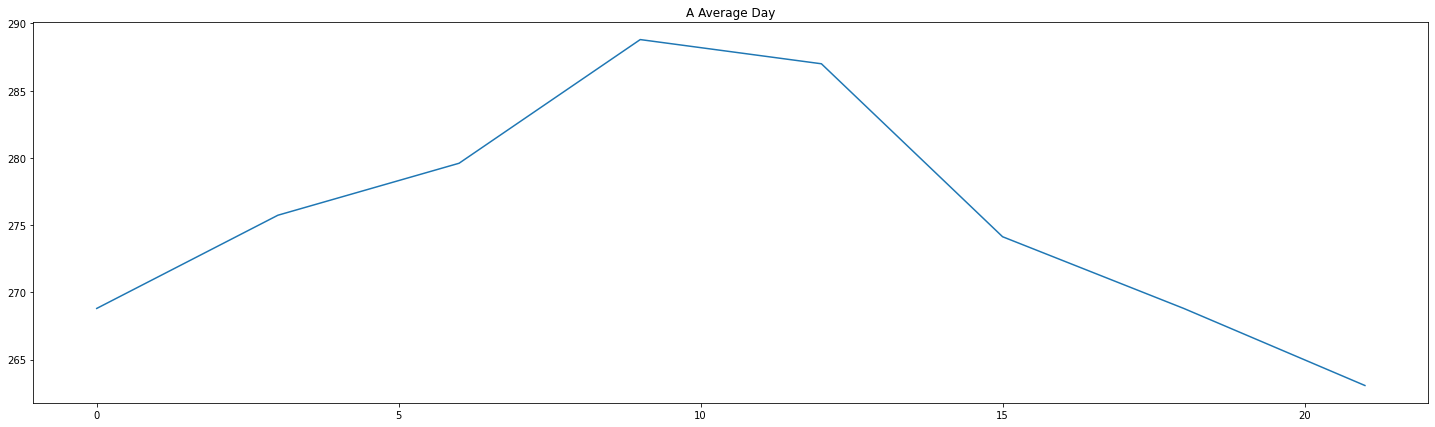

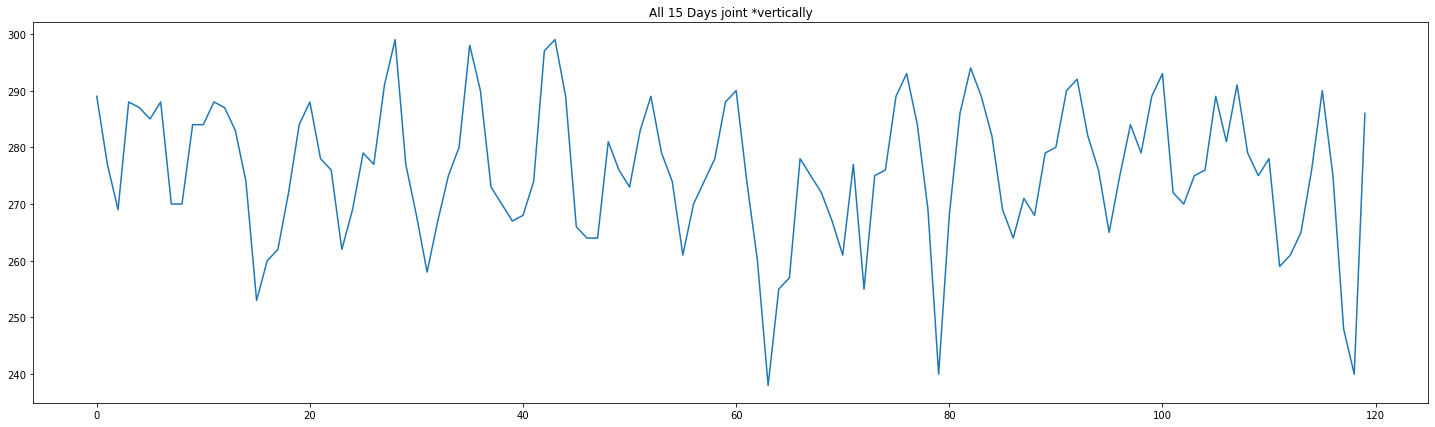


---



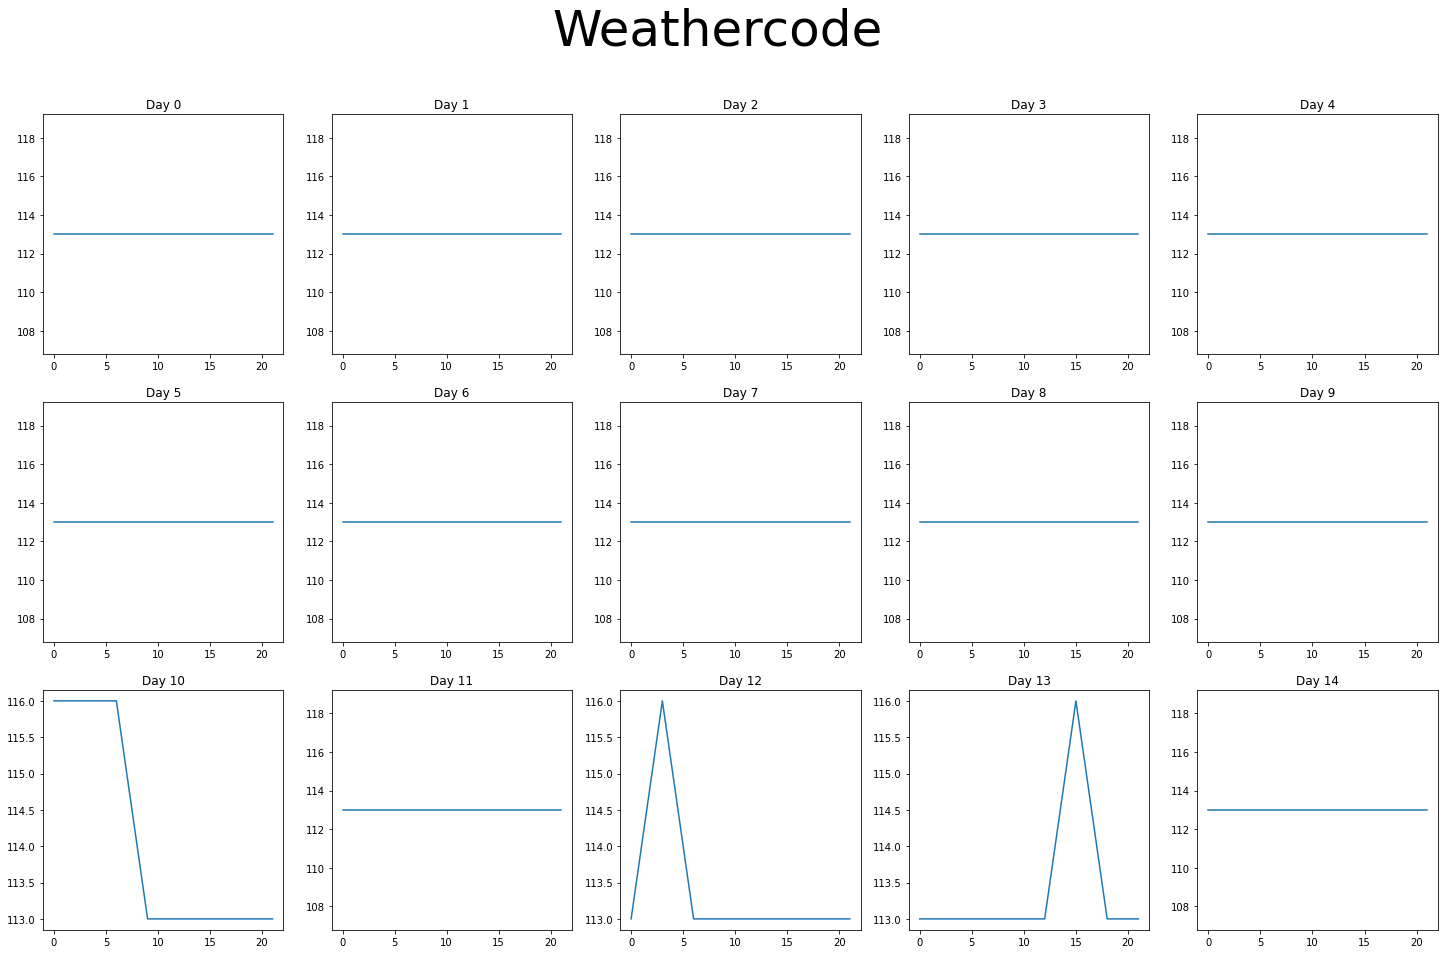

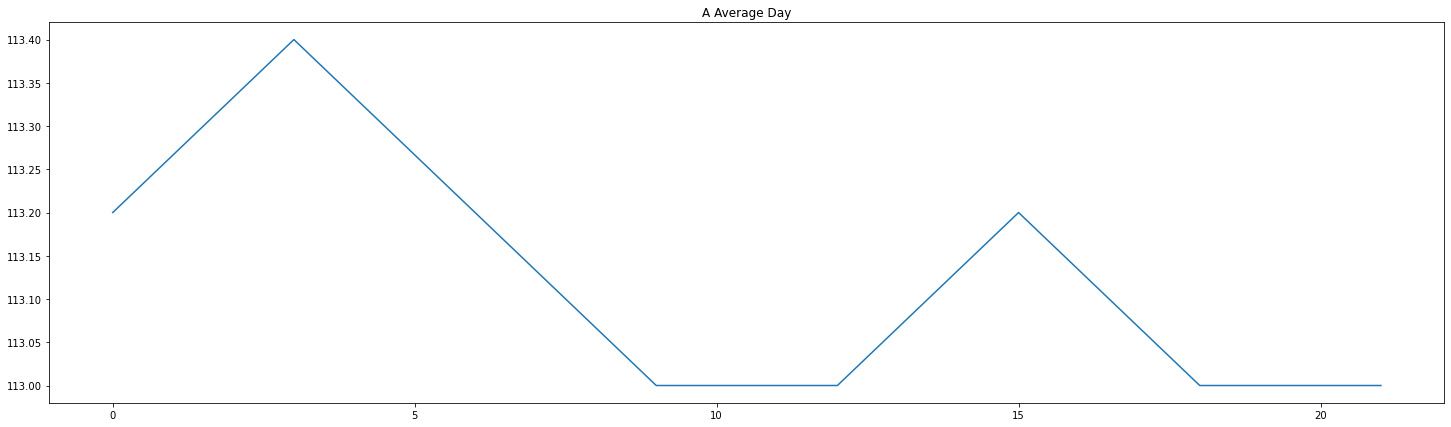

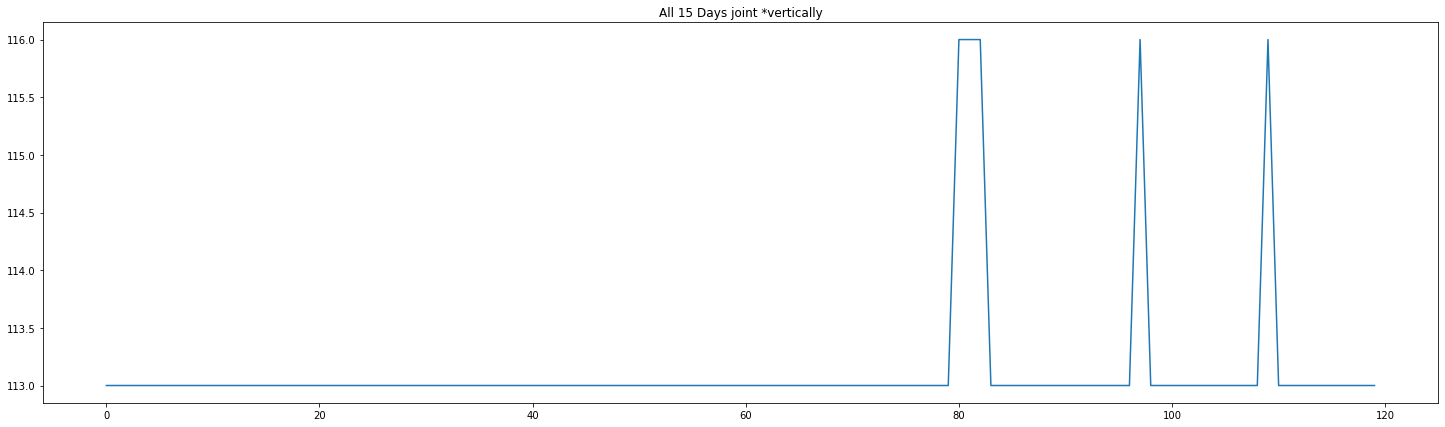


---



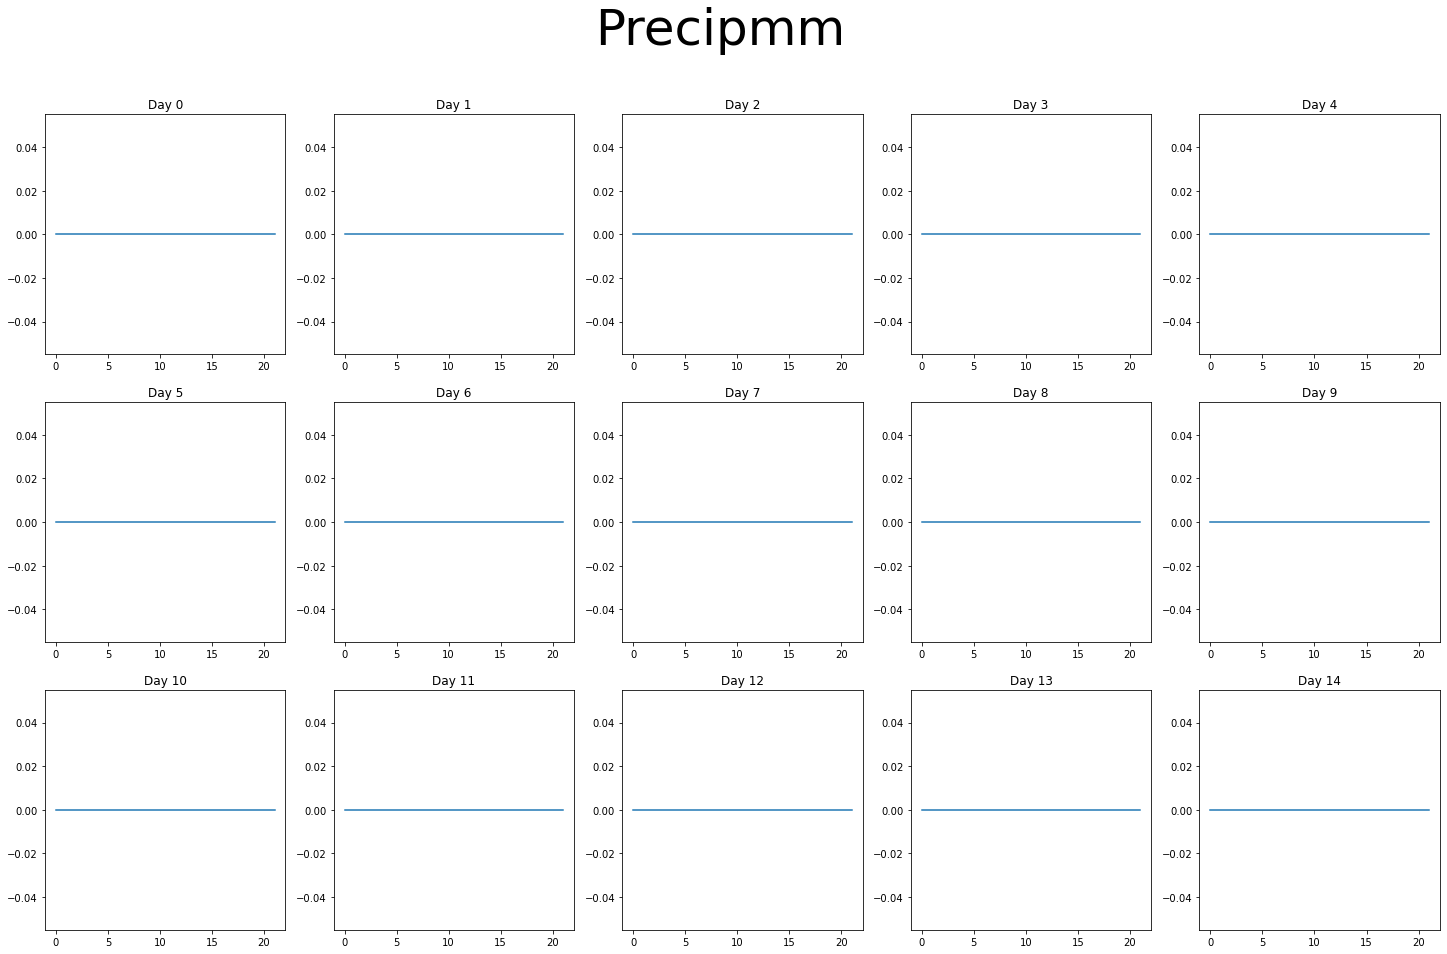

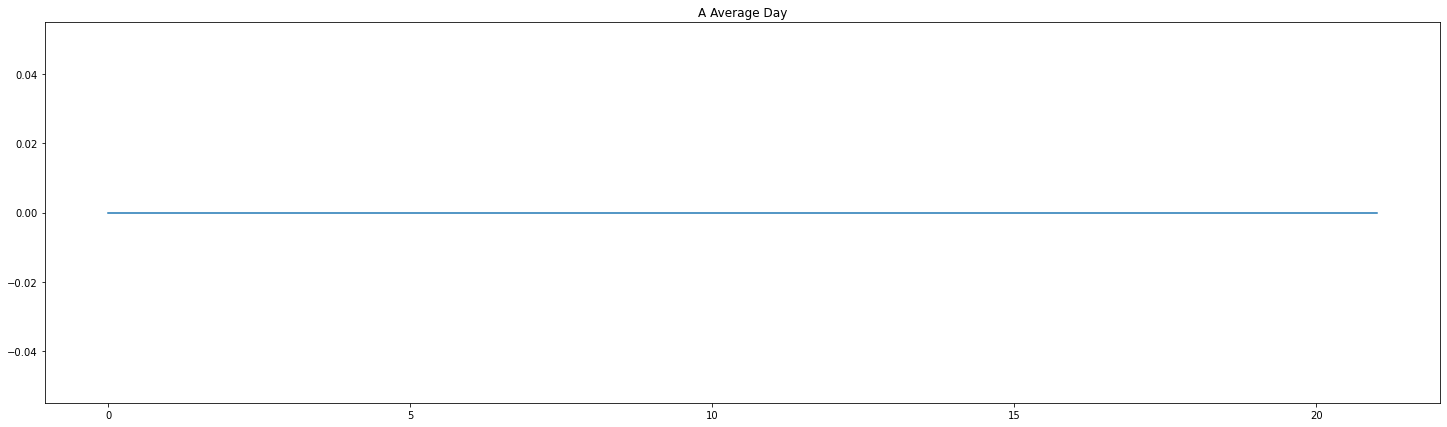

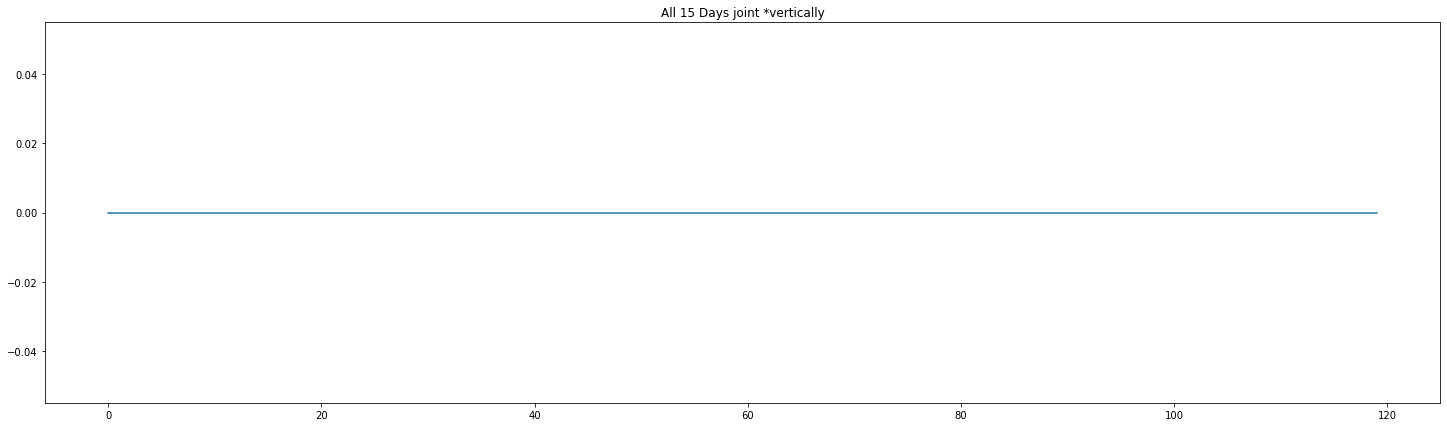


---



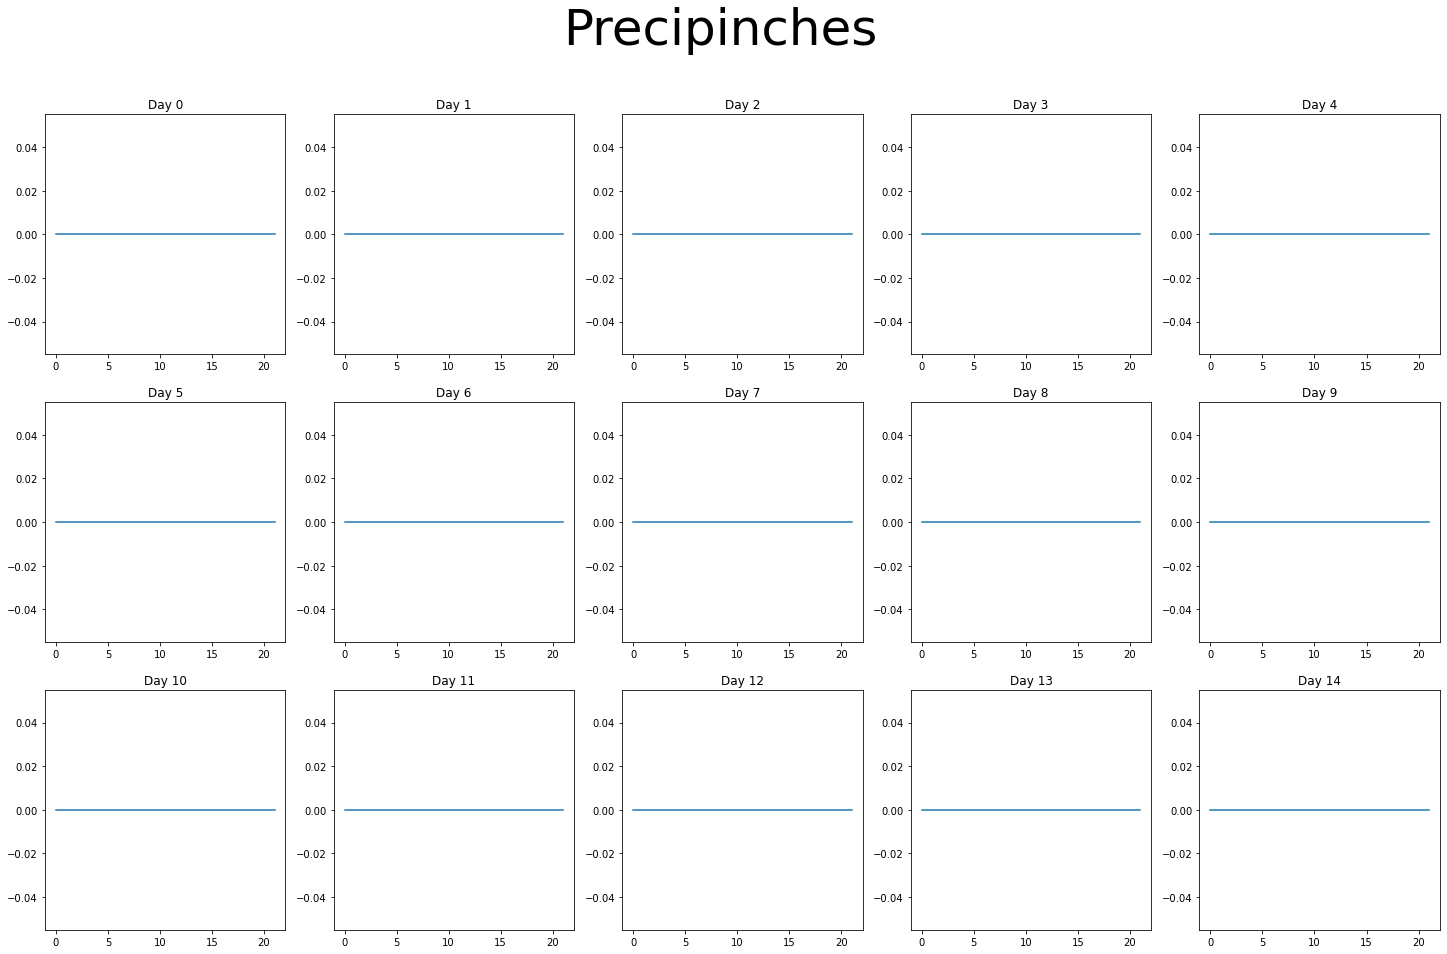

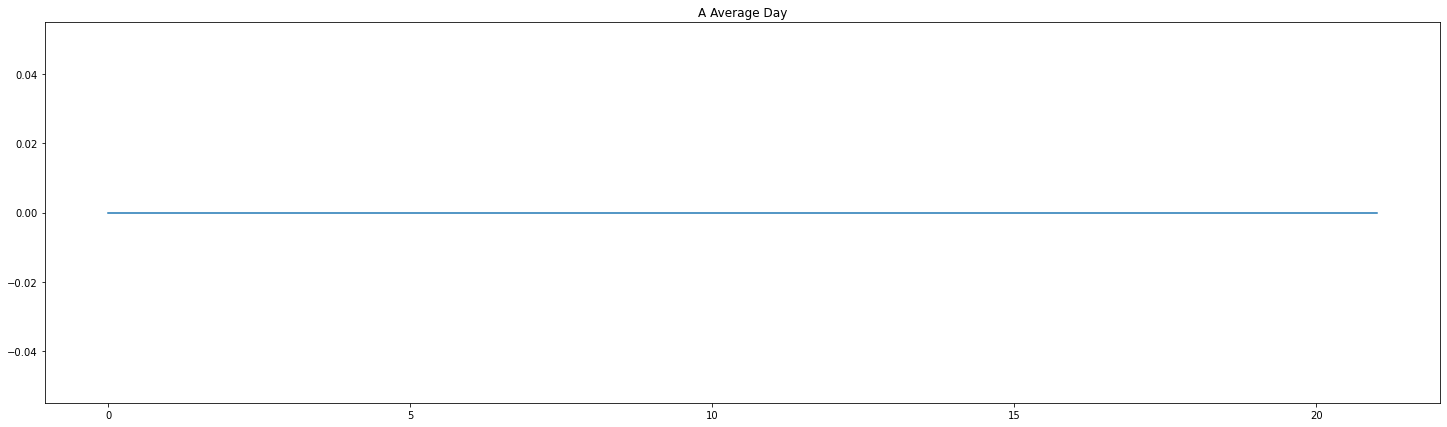

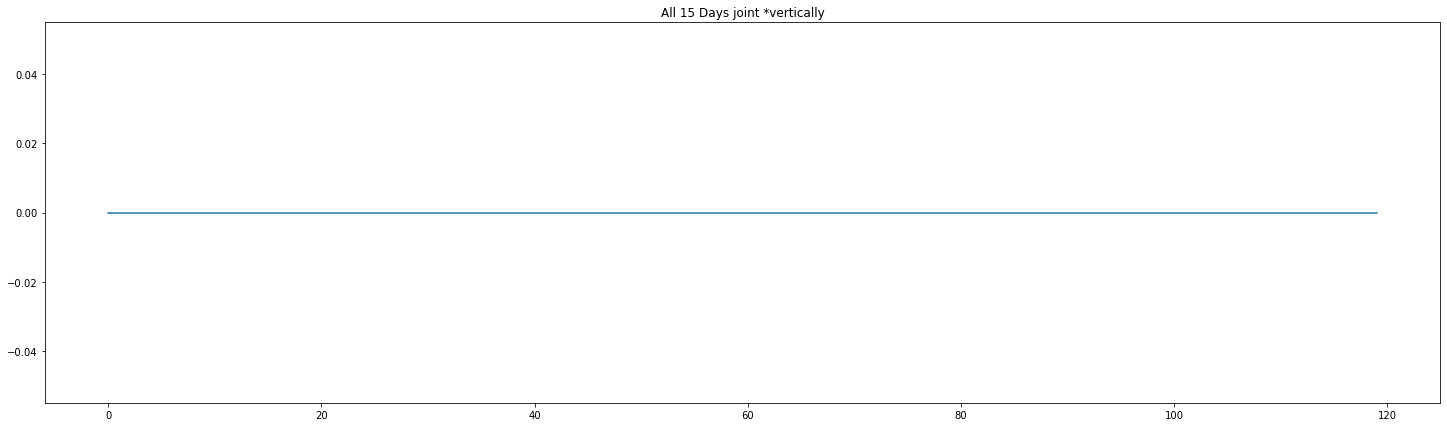


---



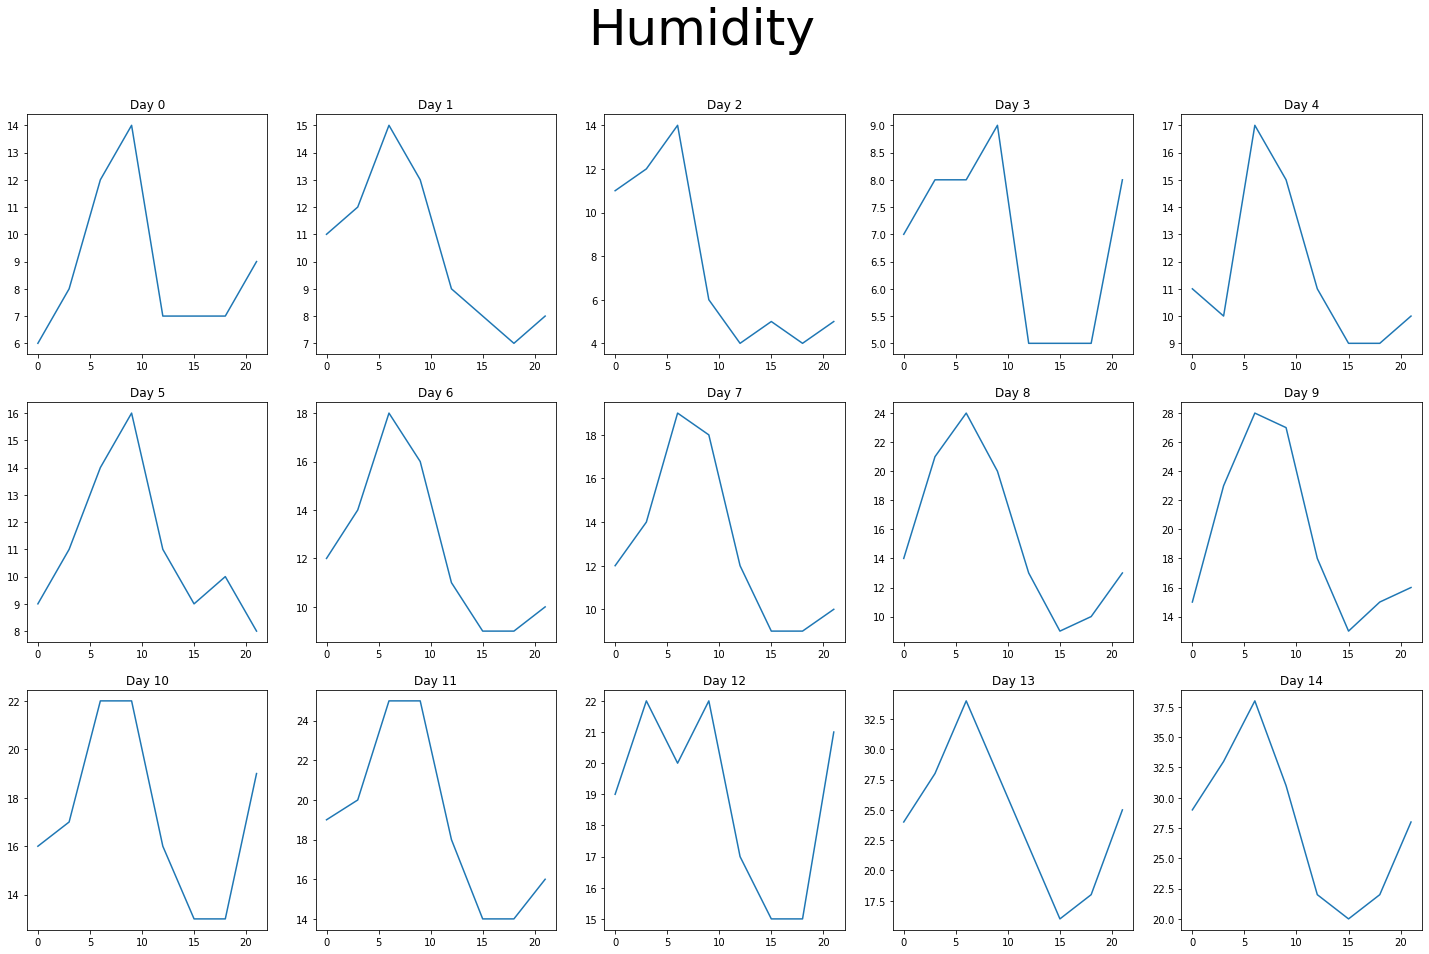

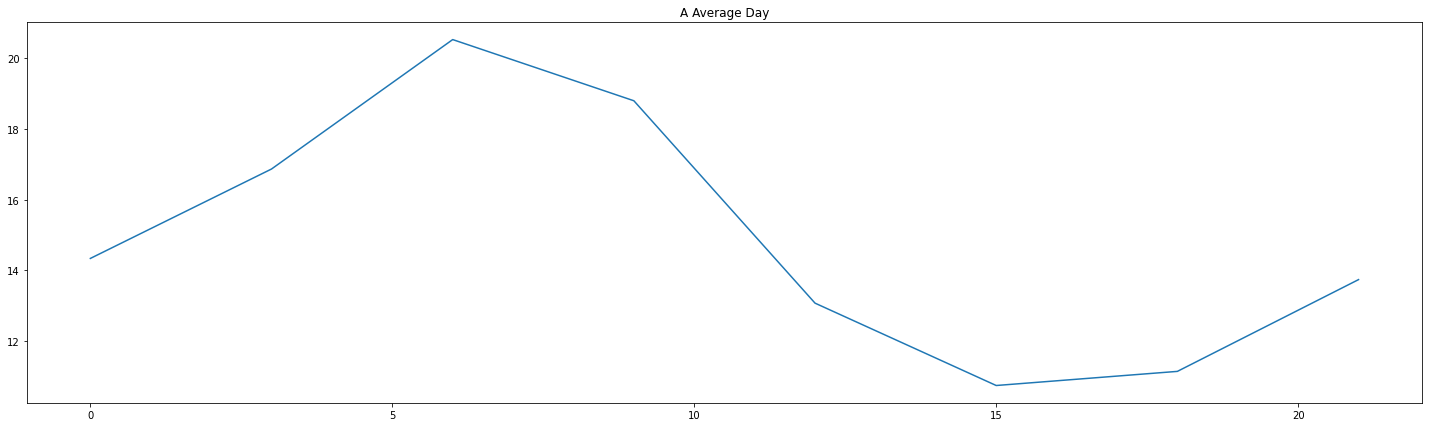

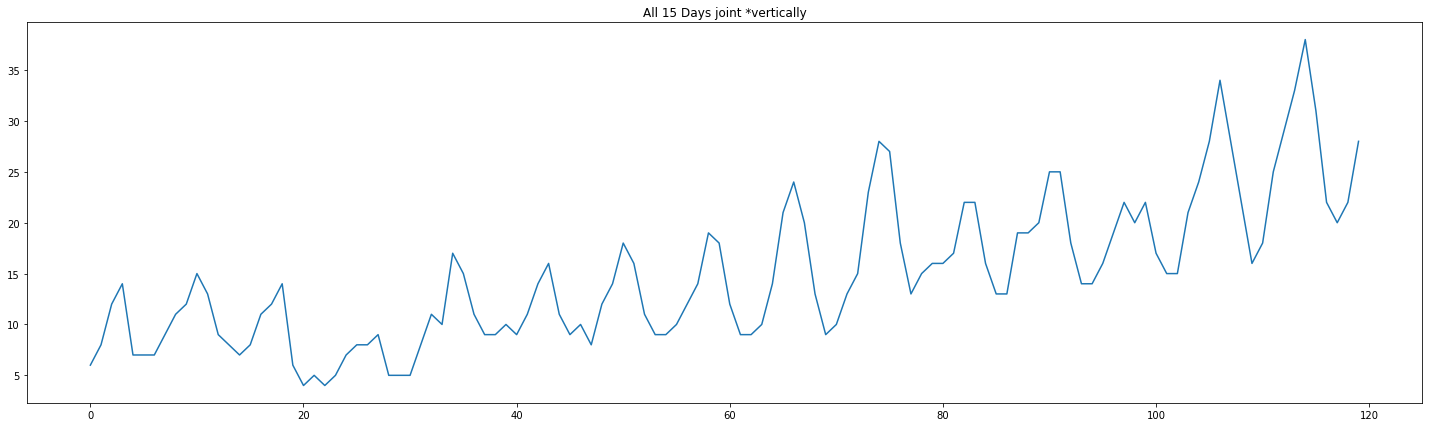


---



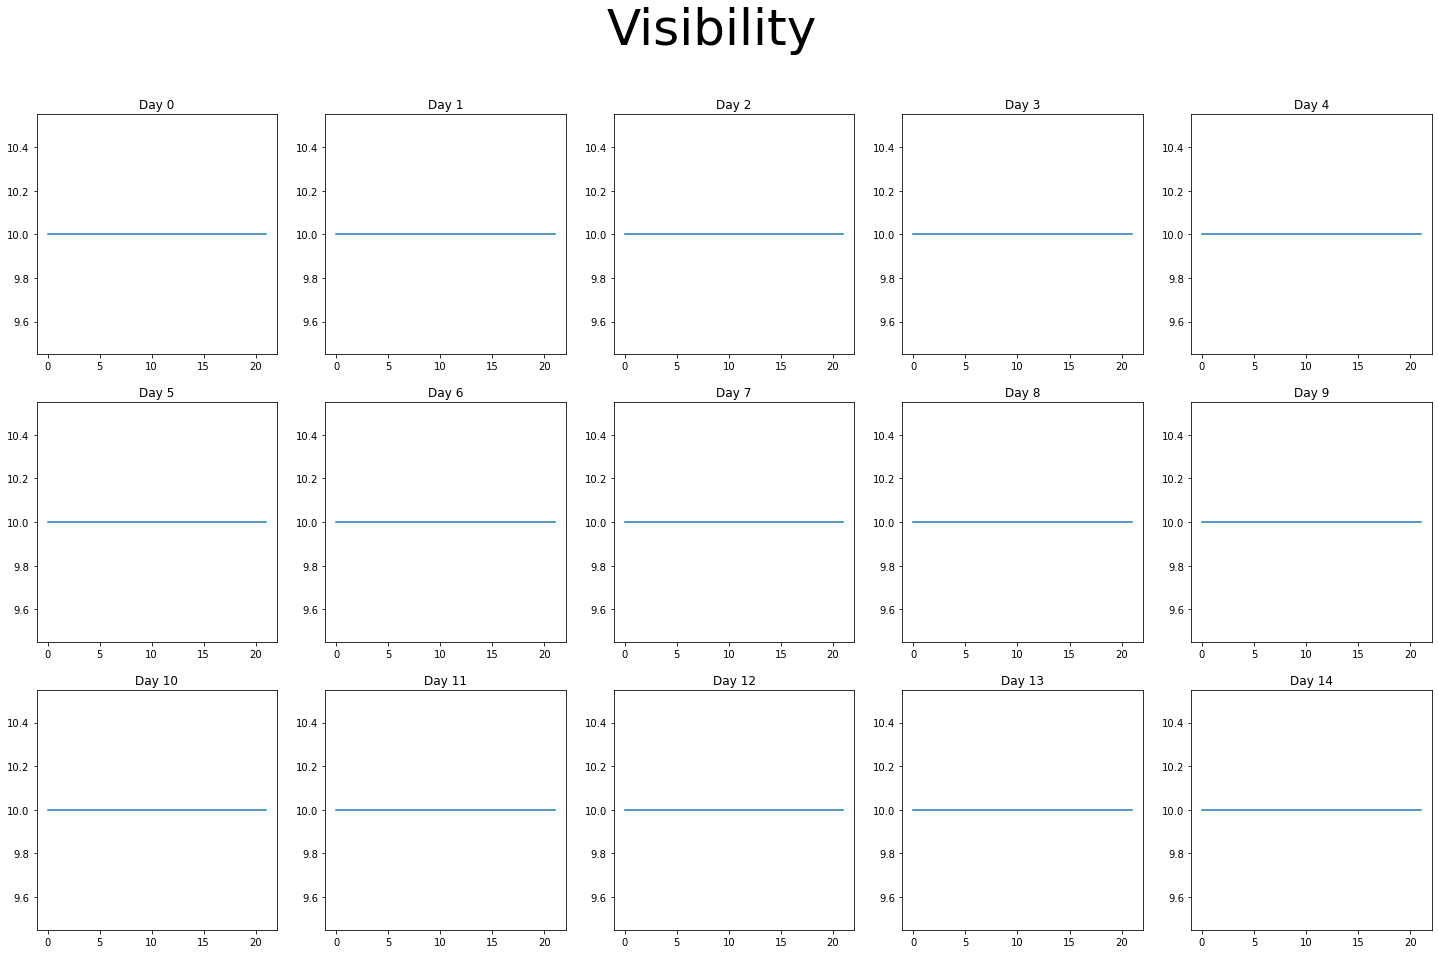

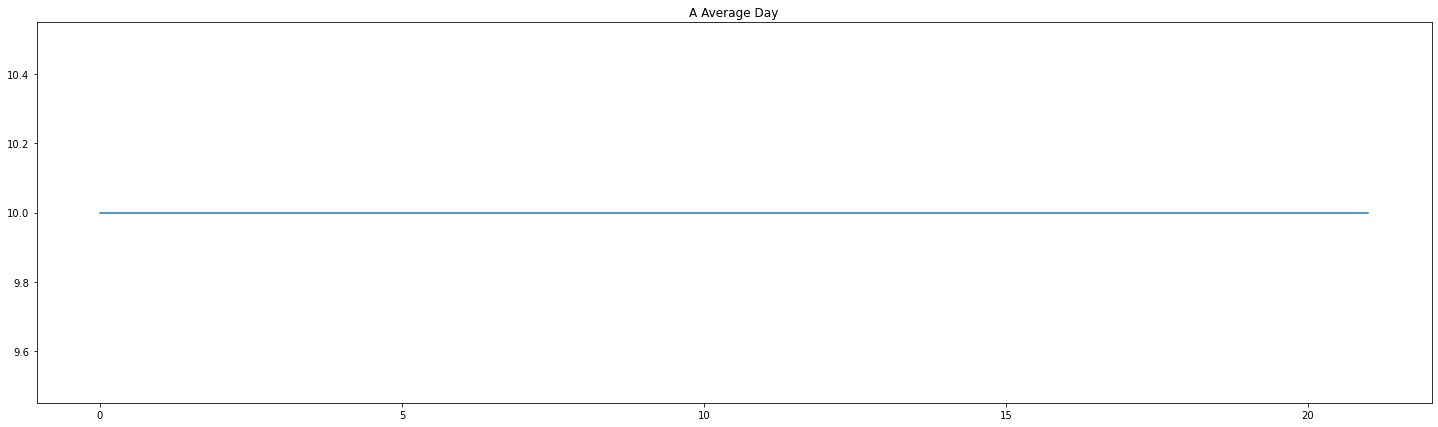

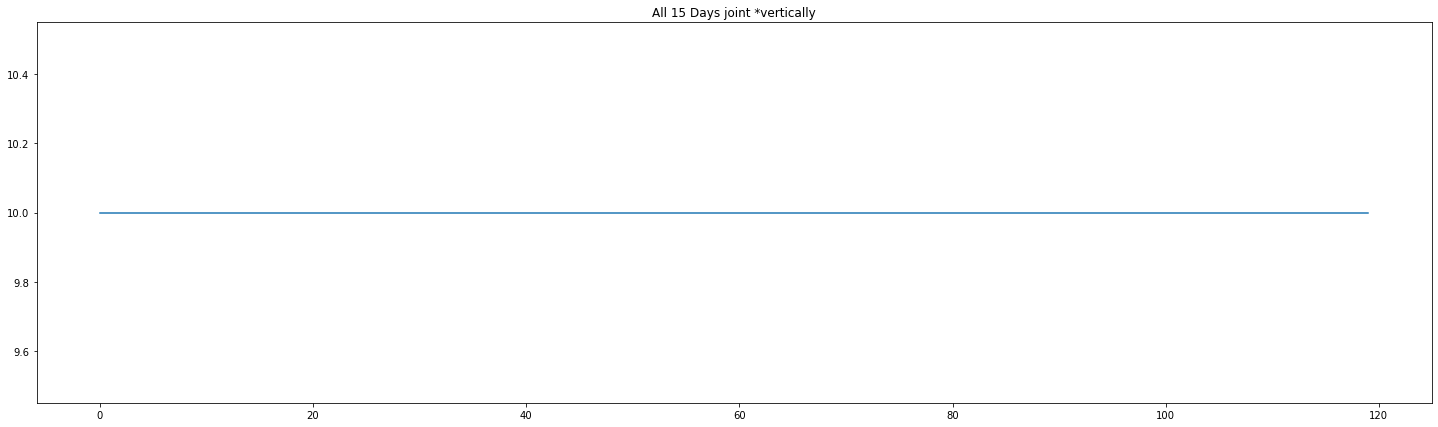


---



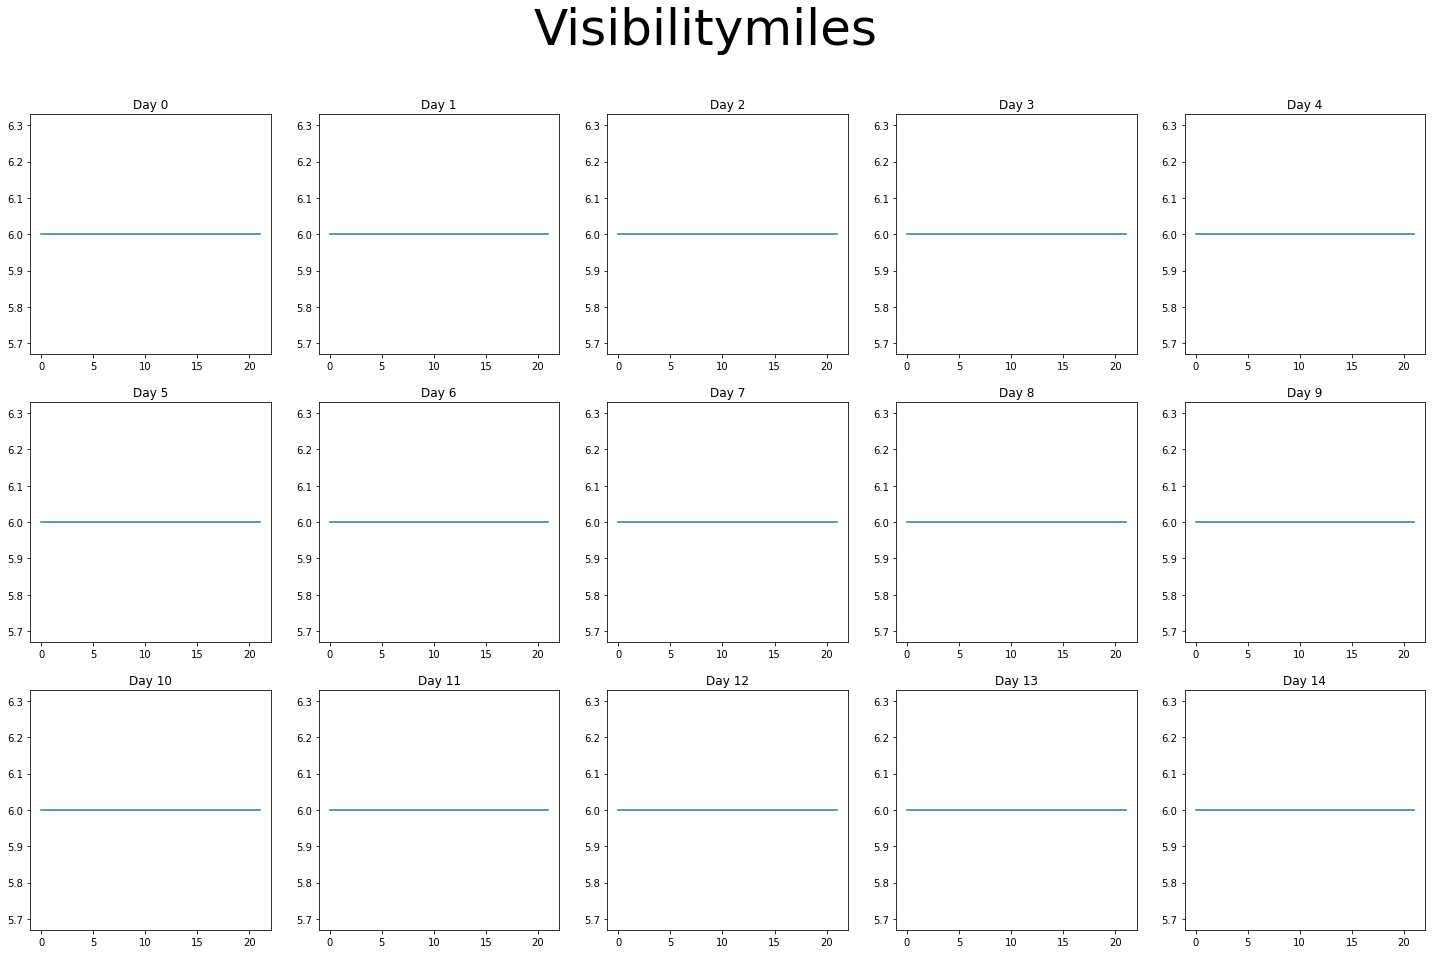

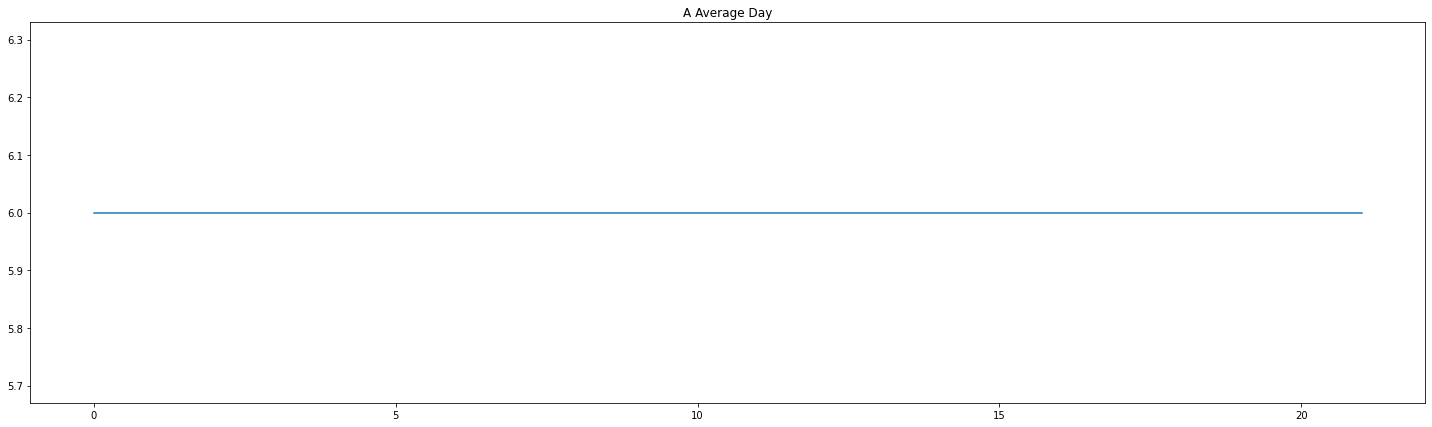

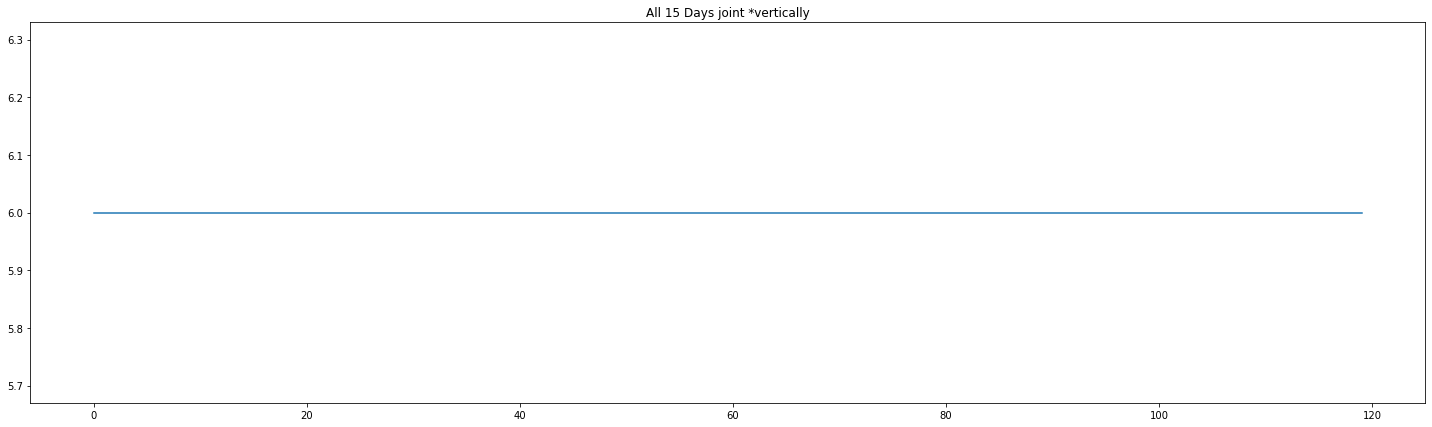


---



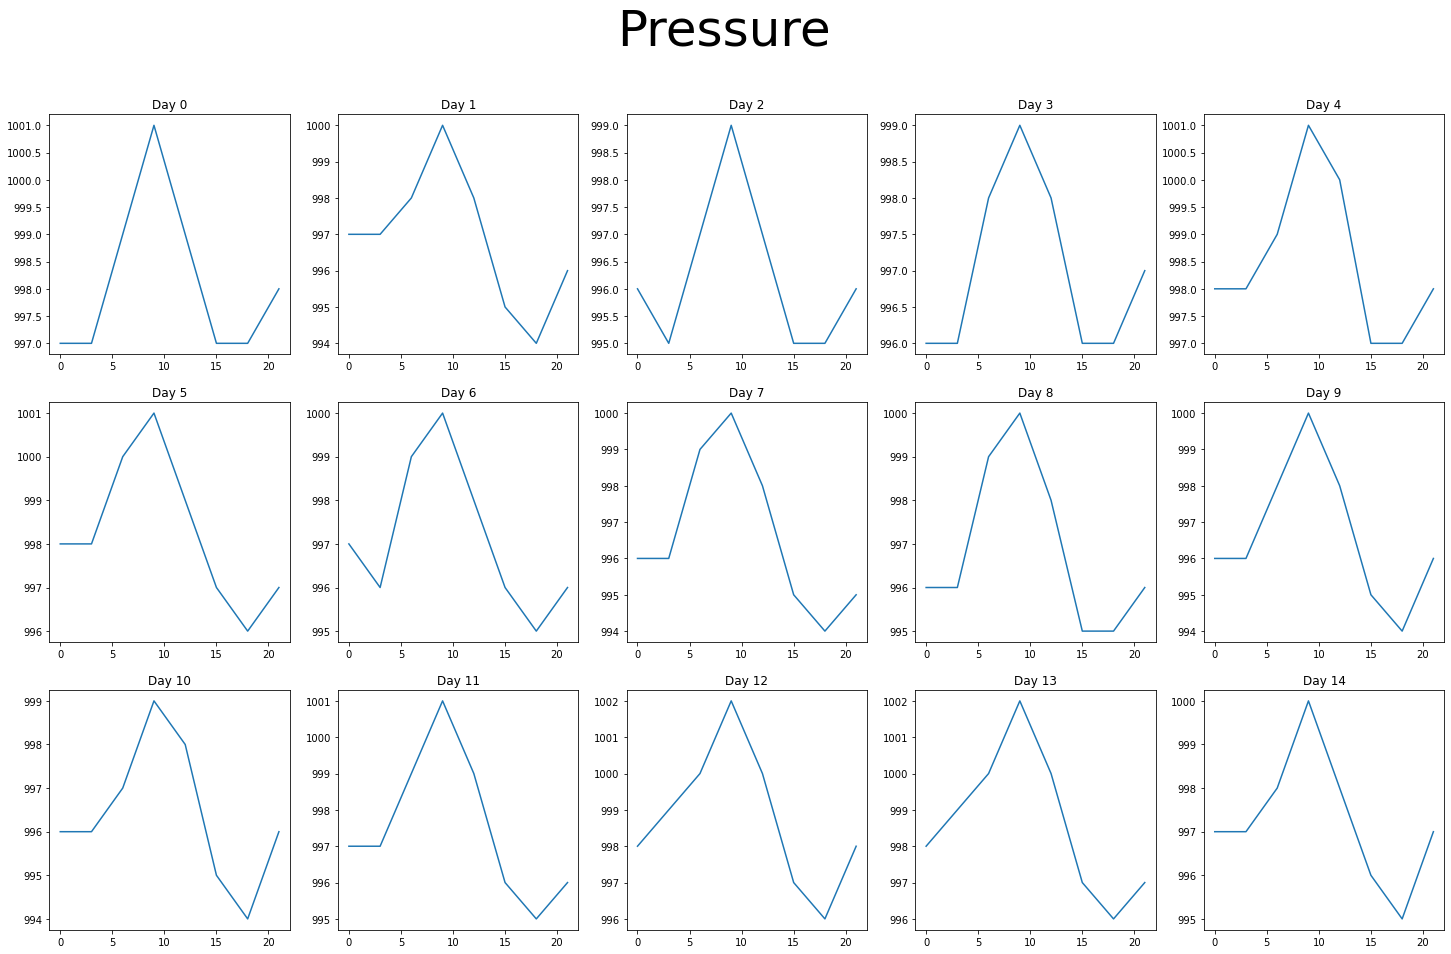

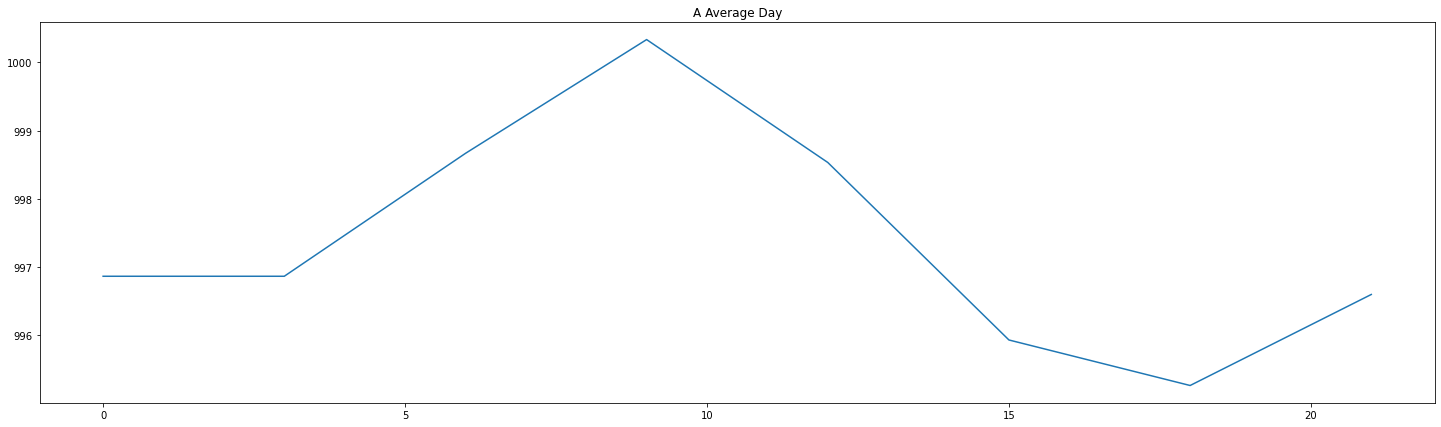

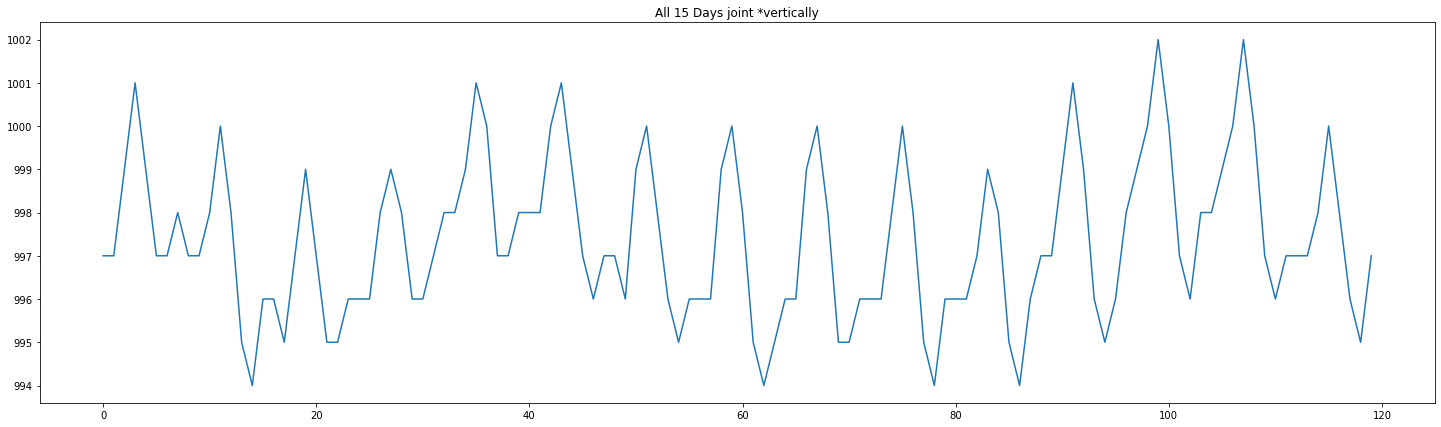


---



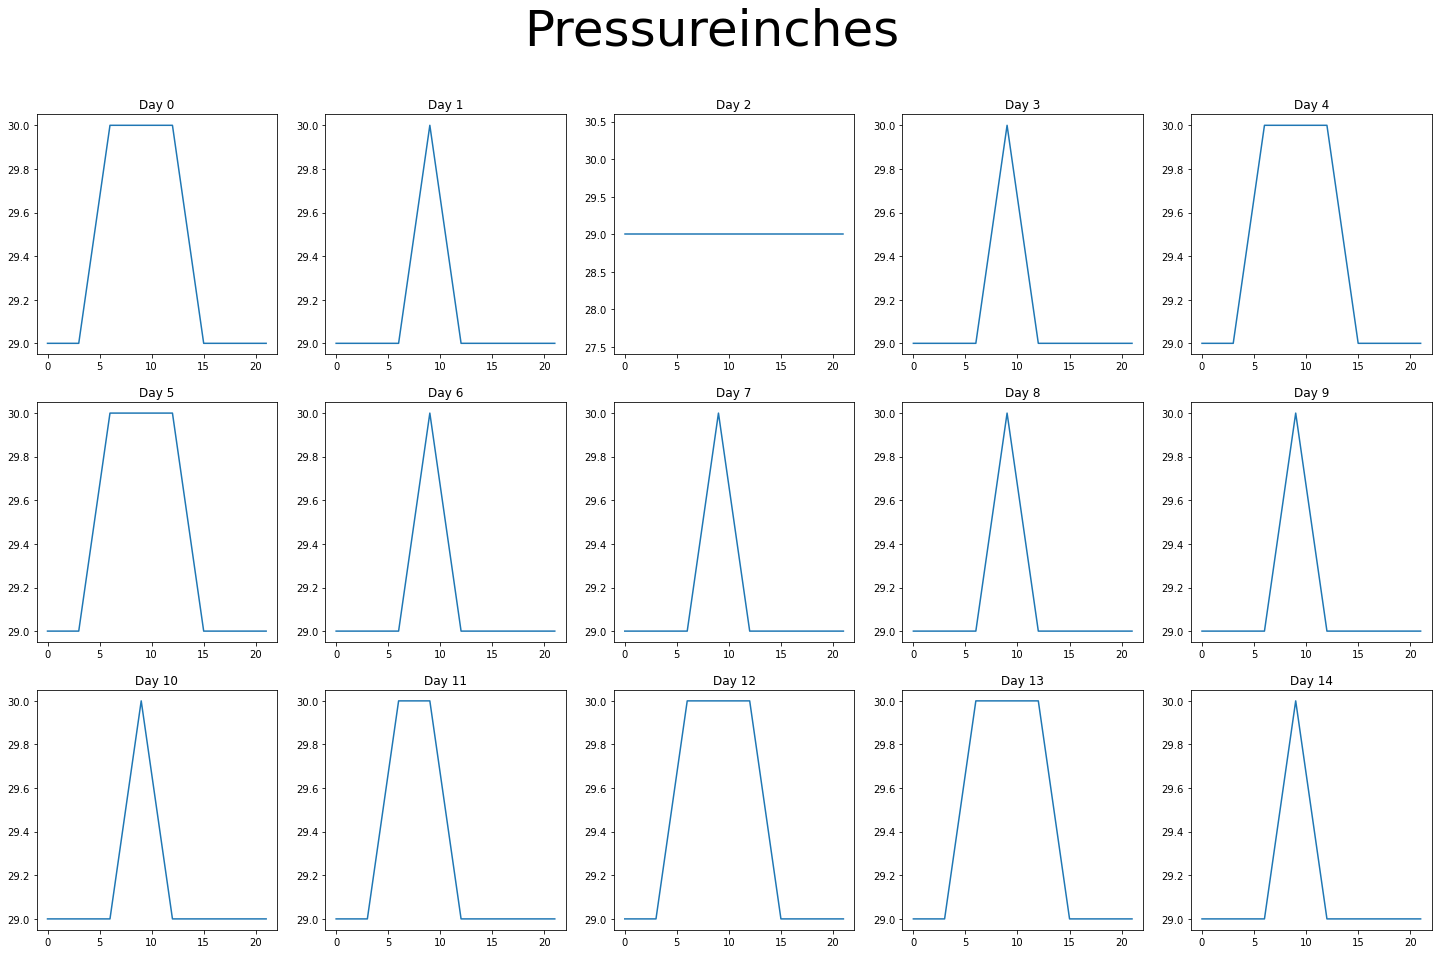

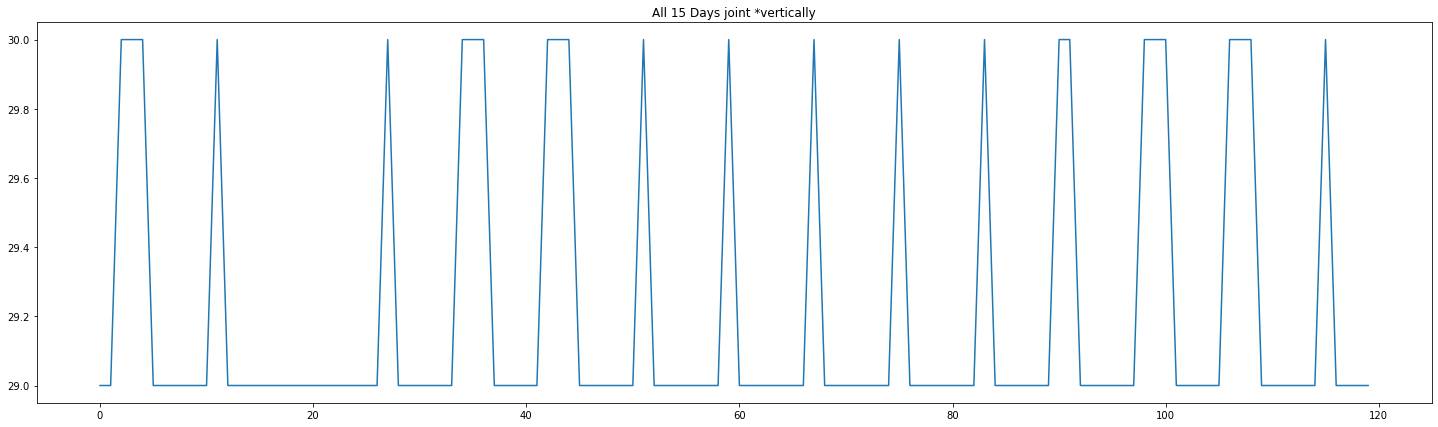


---



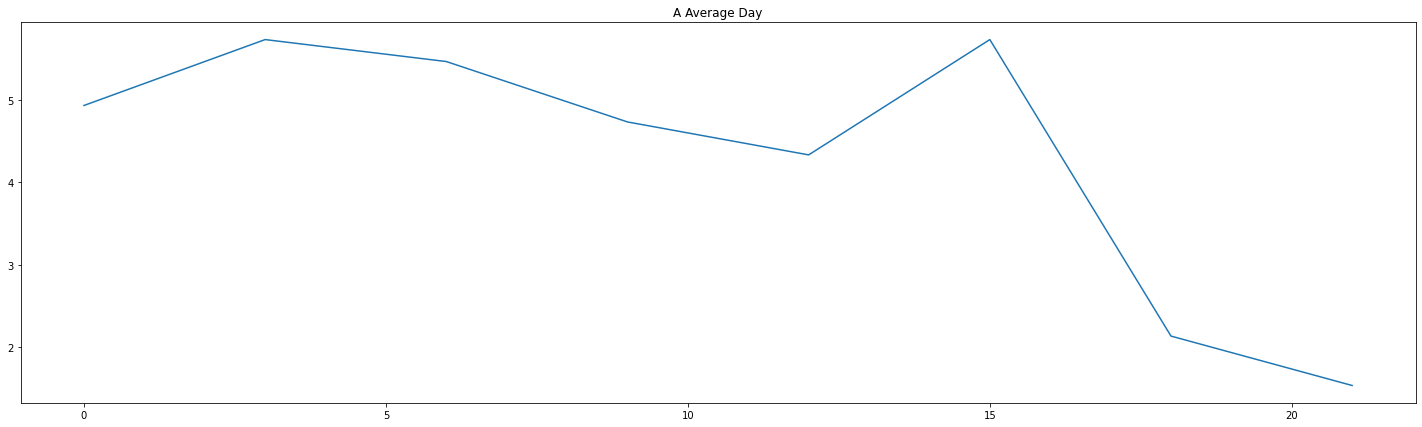


---



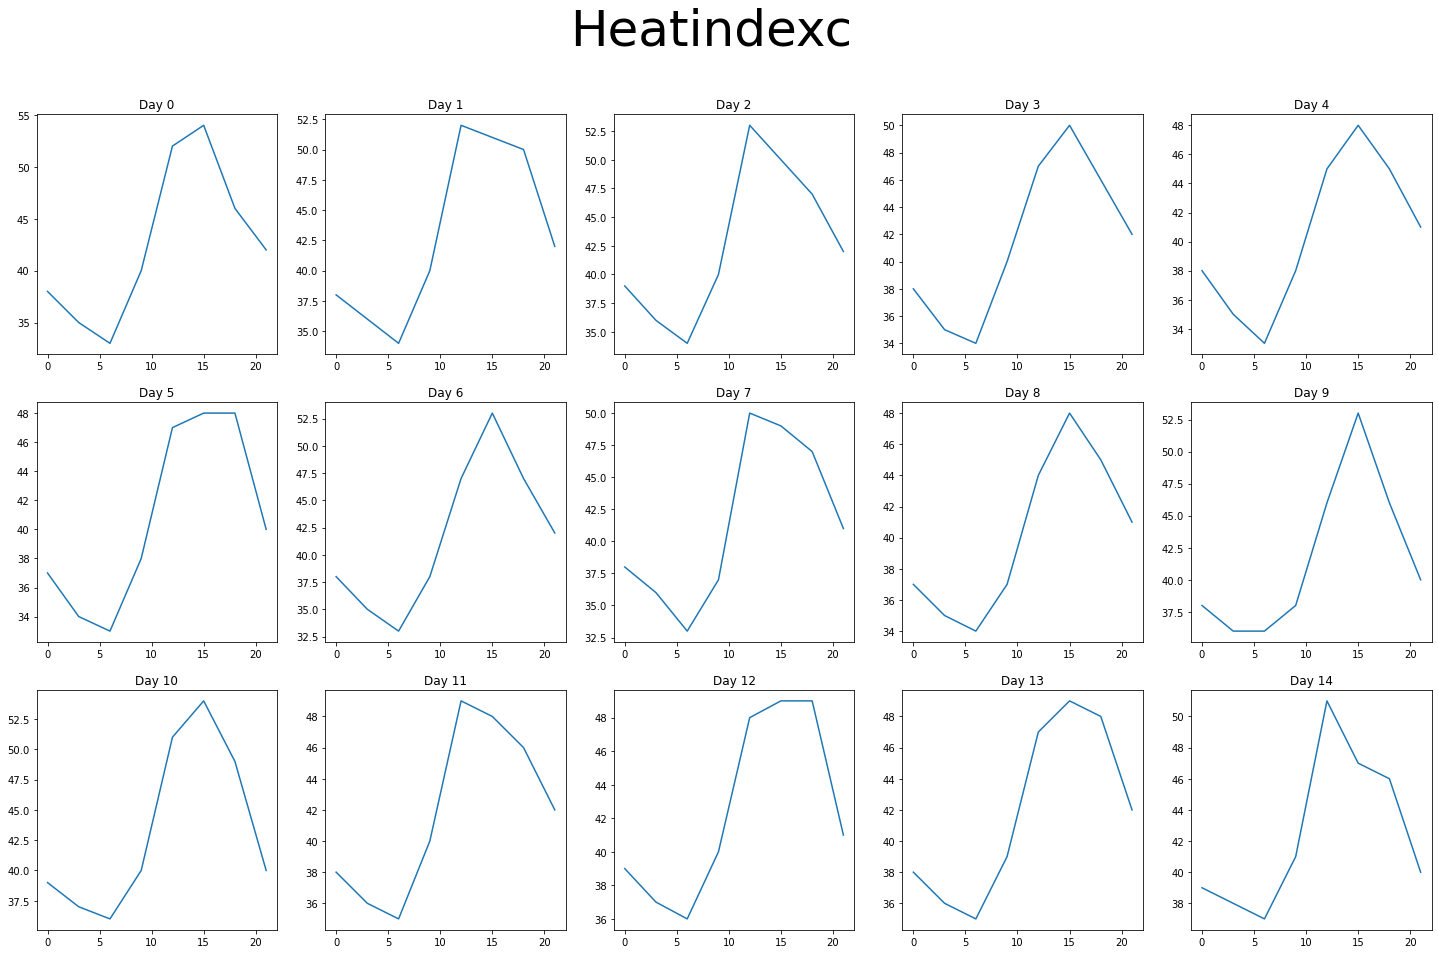

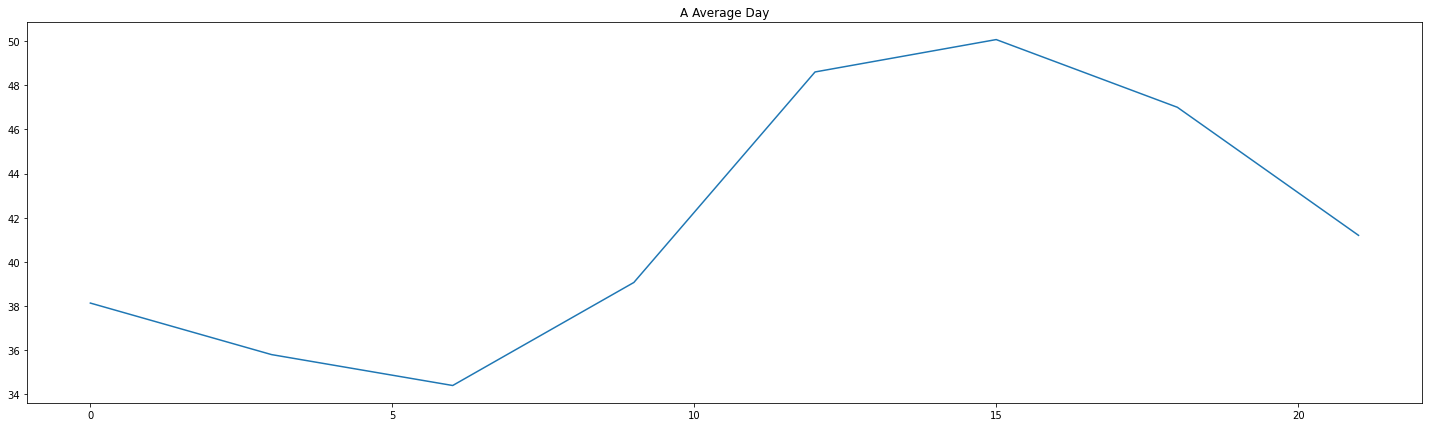


---



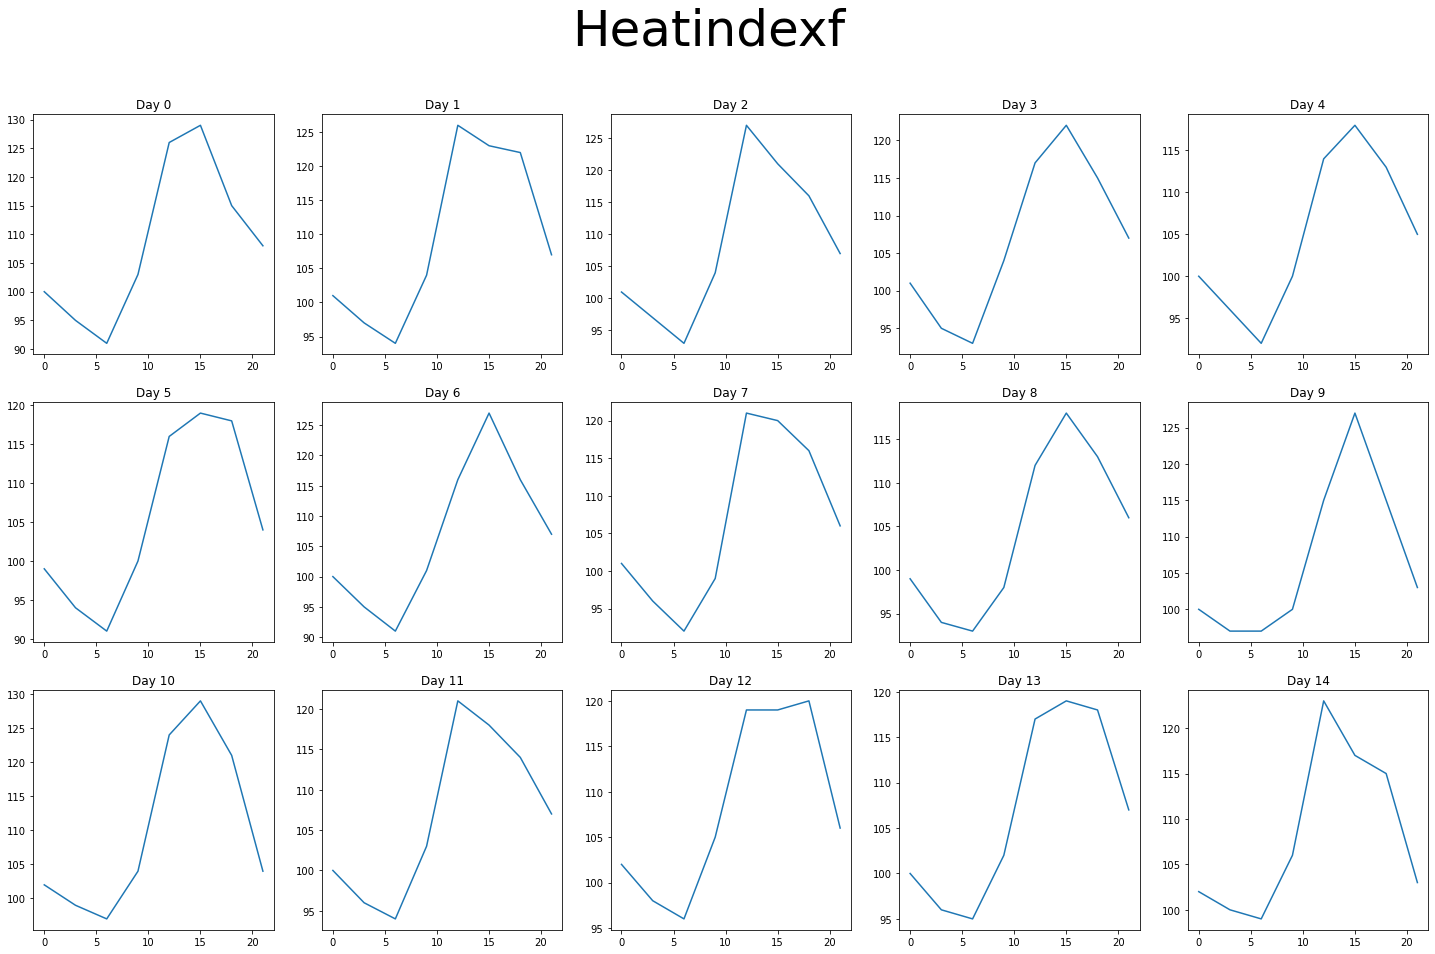

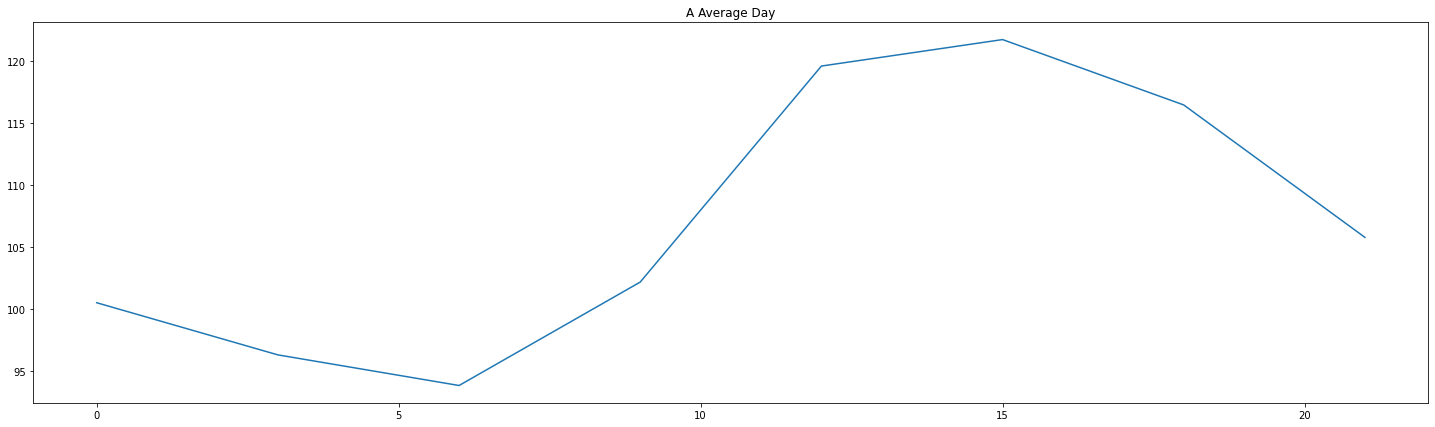

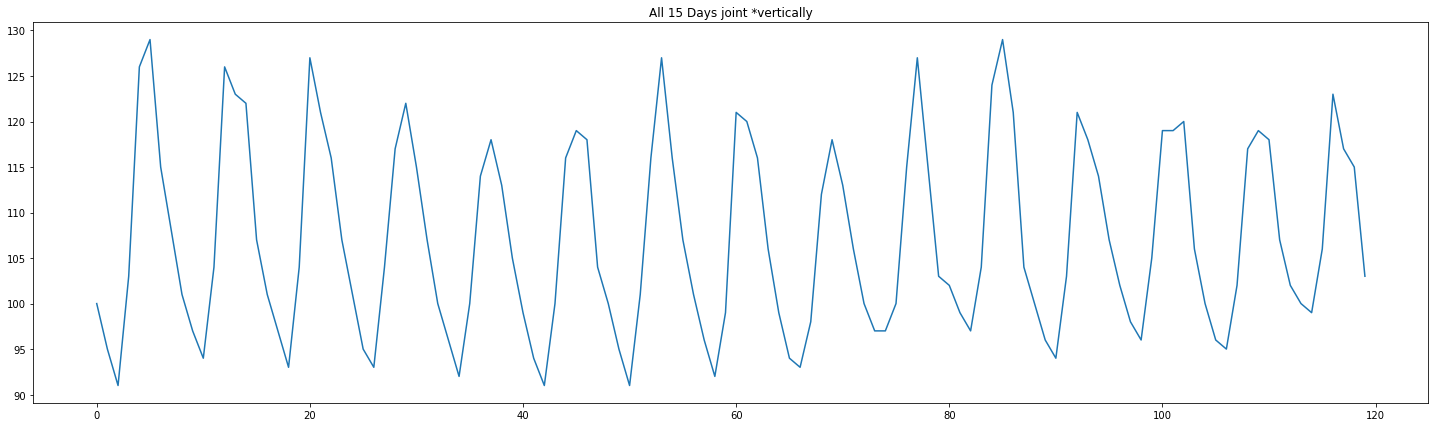


---



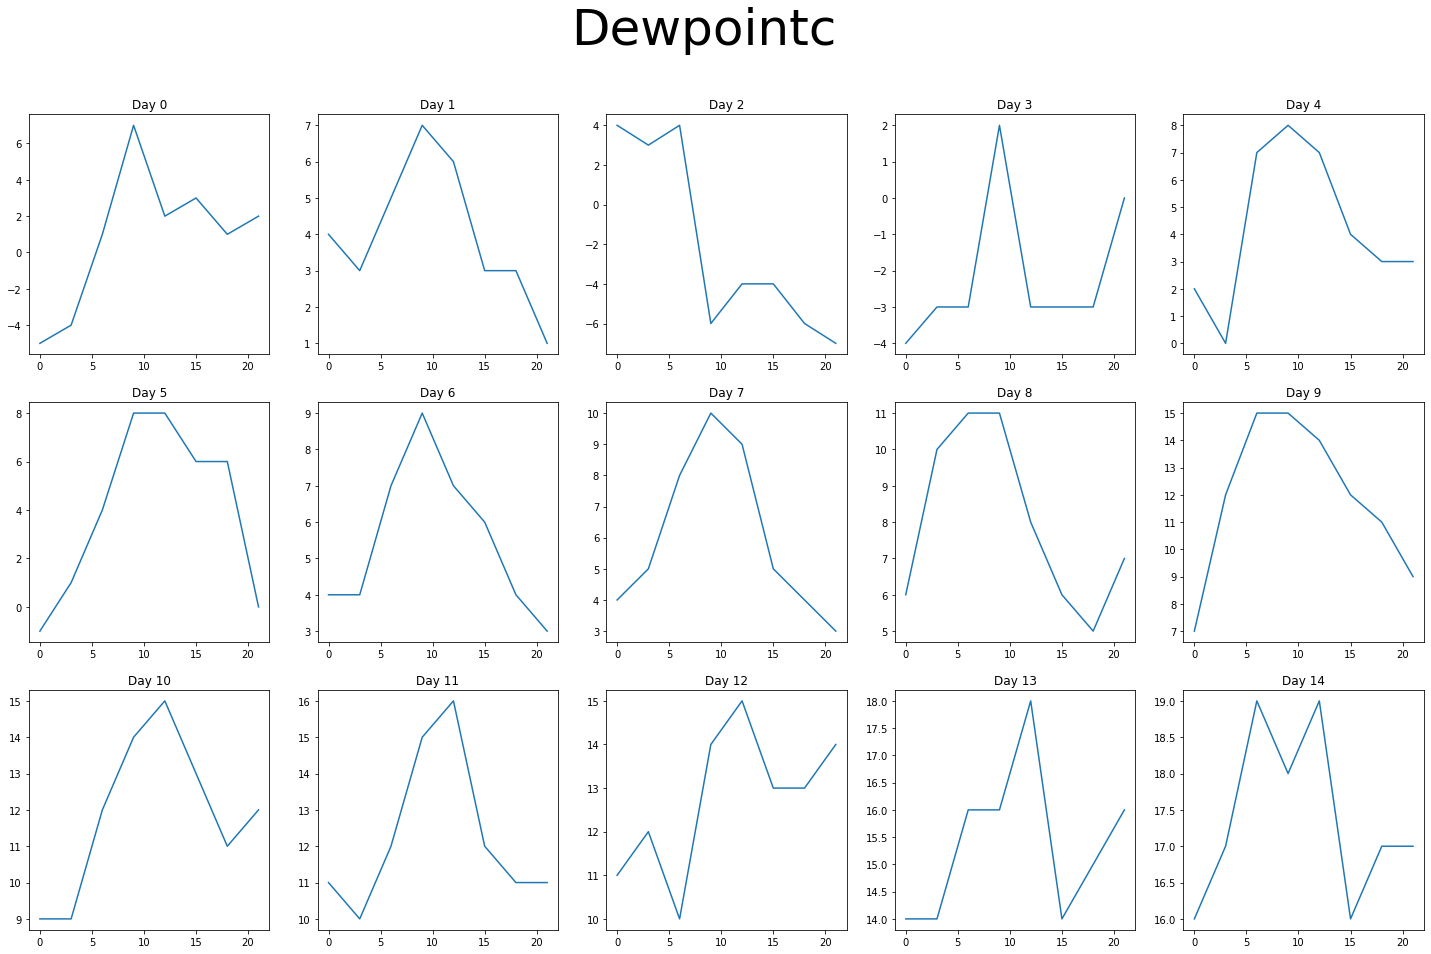

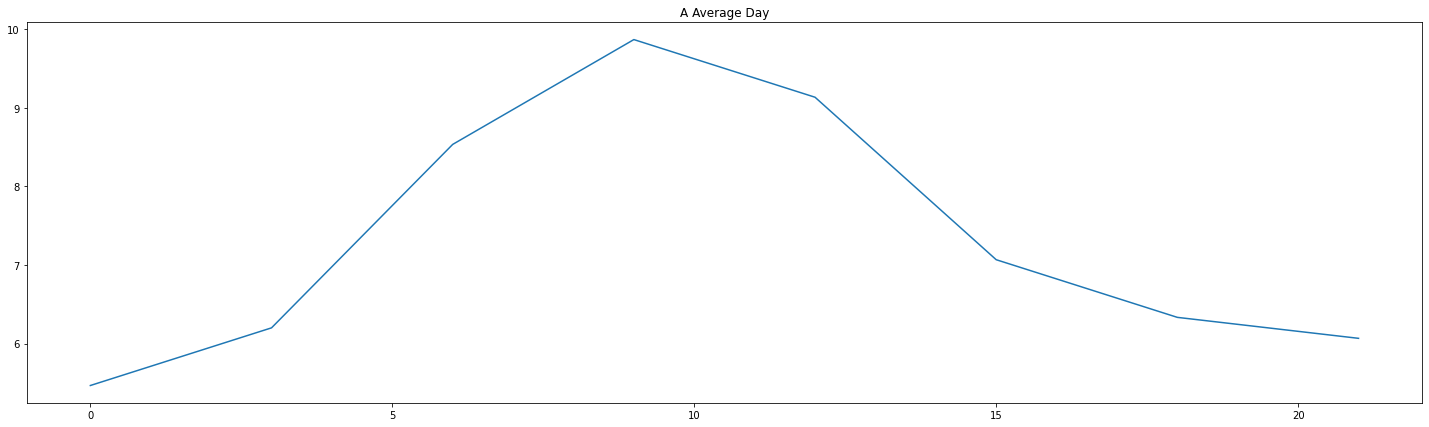

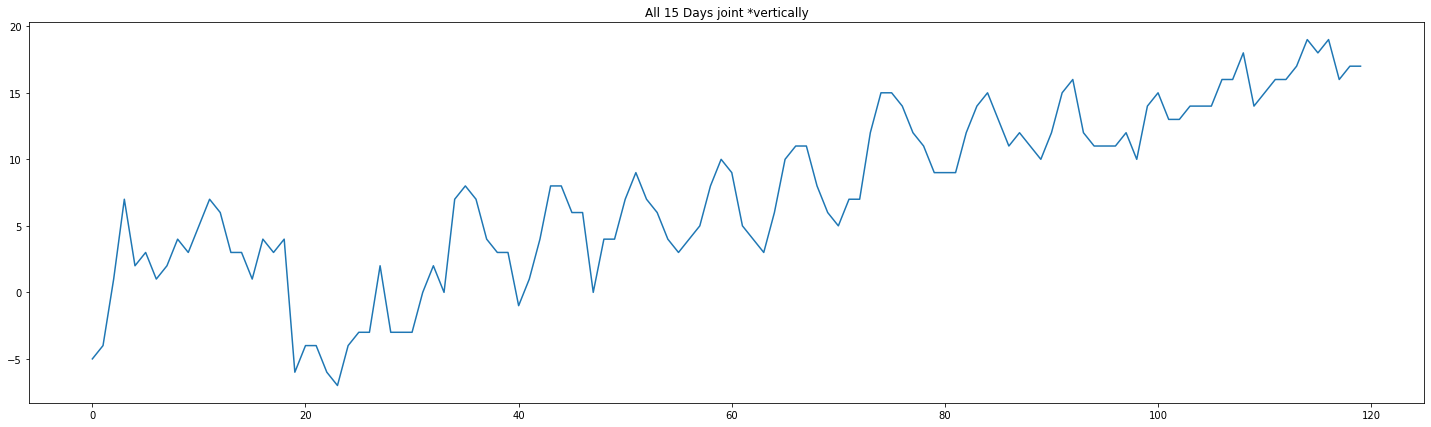


---



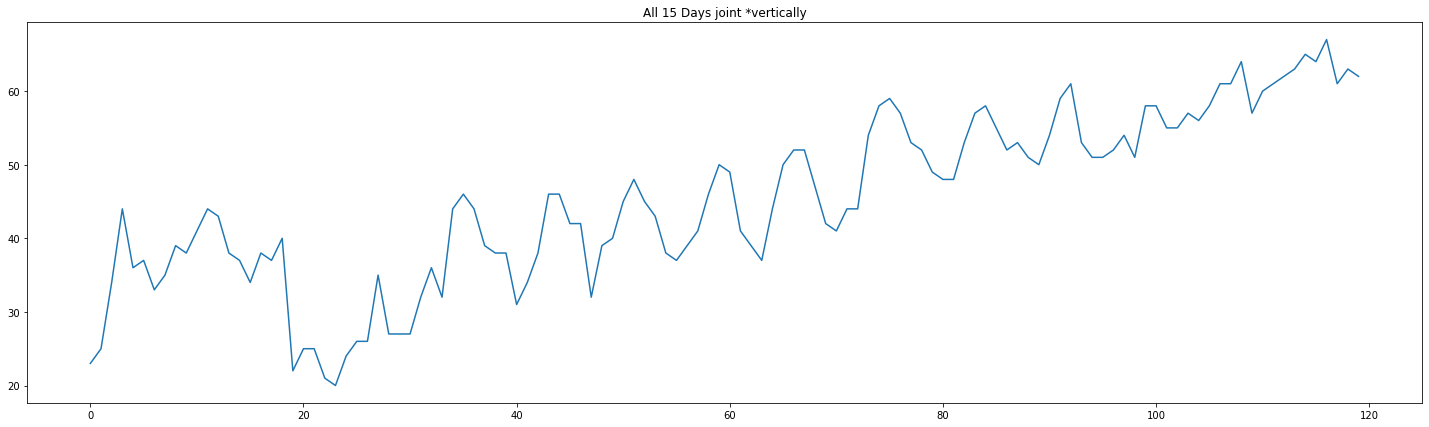


---



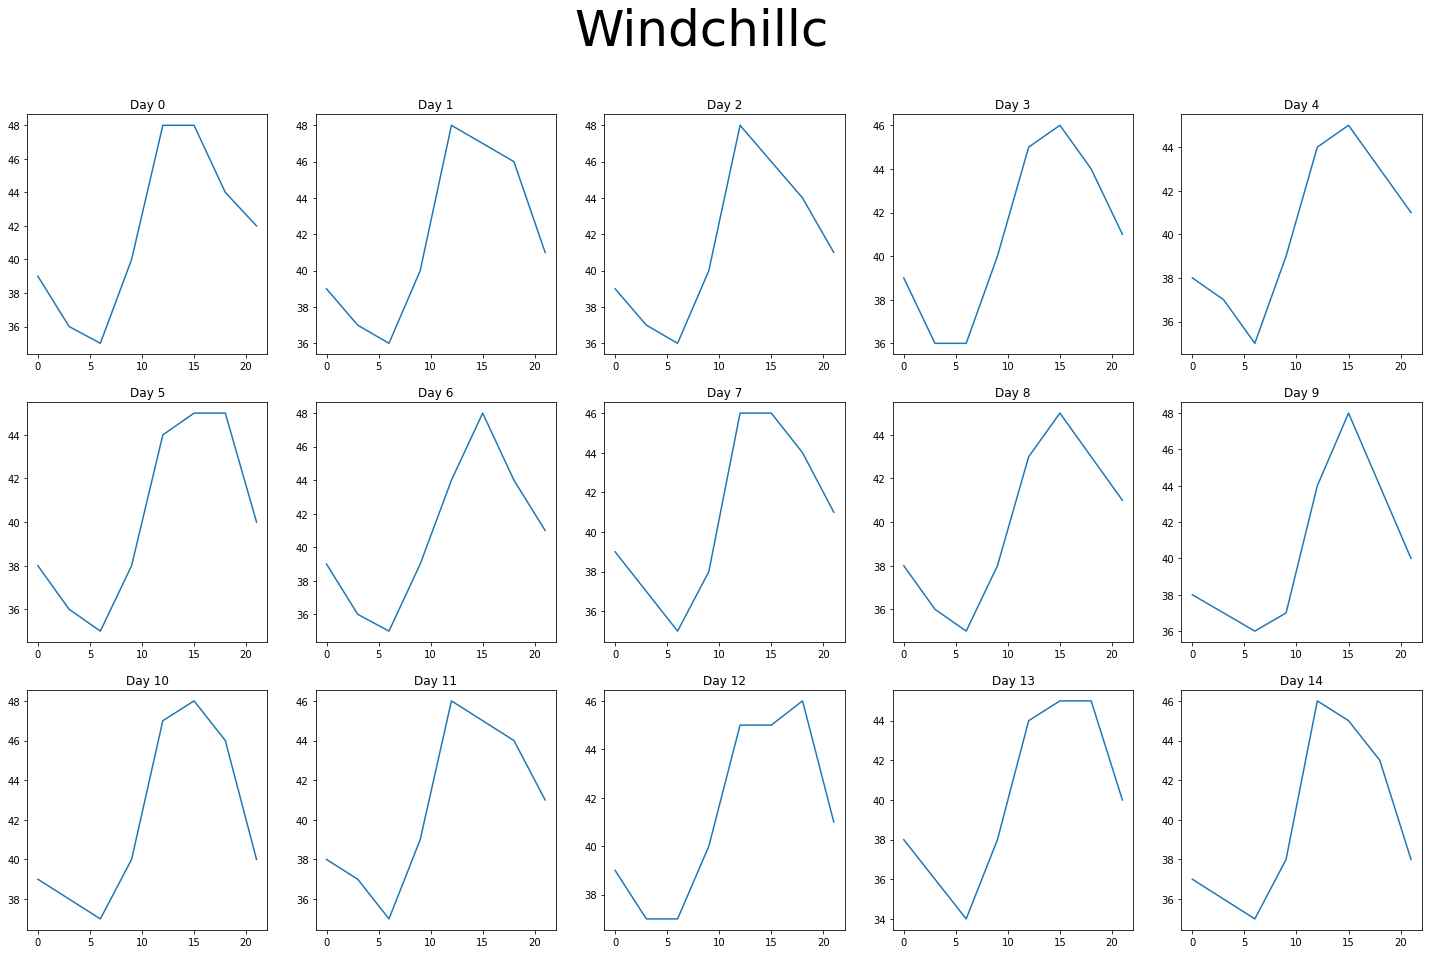

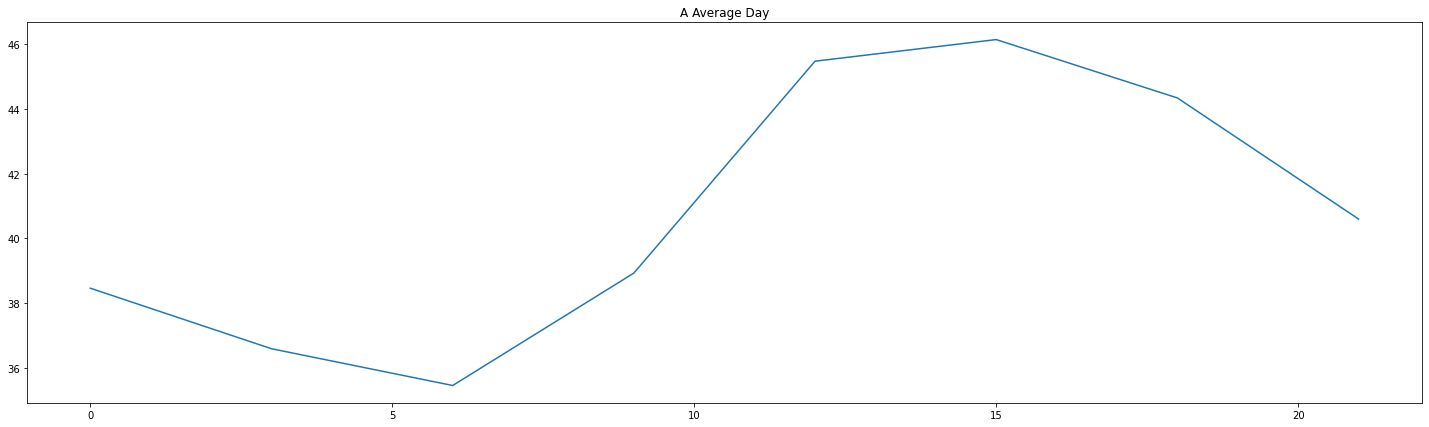


---



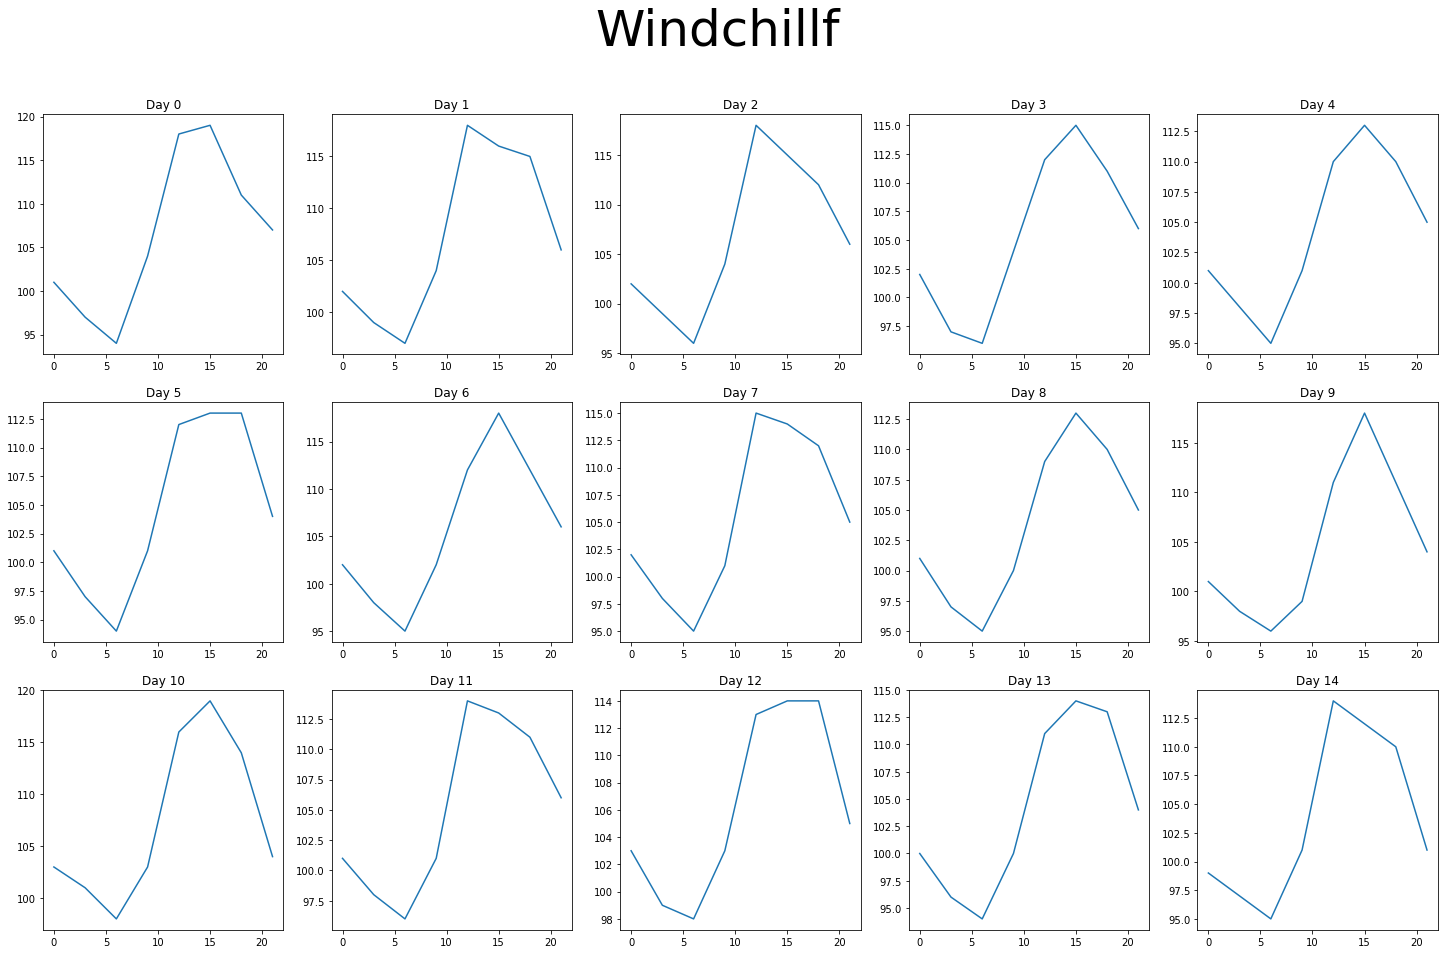

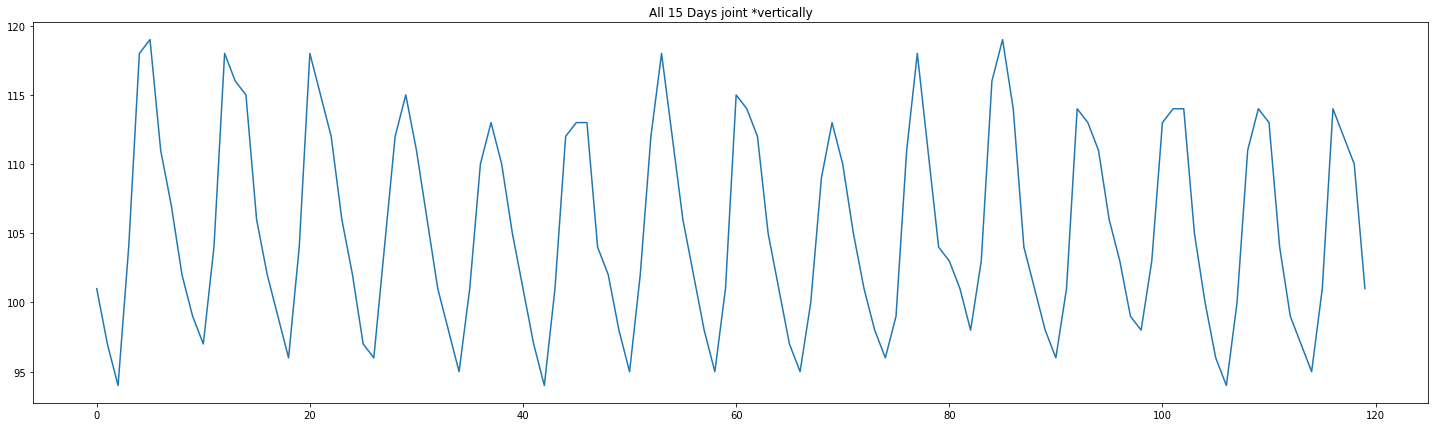


---



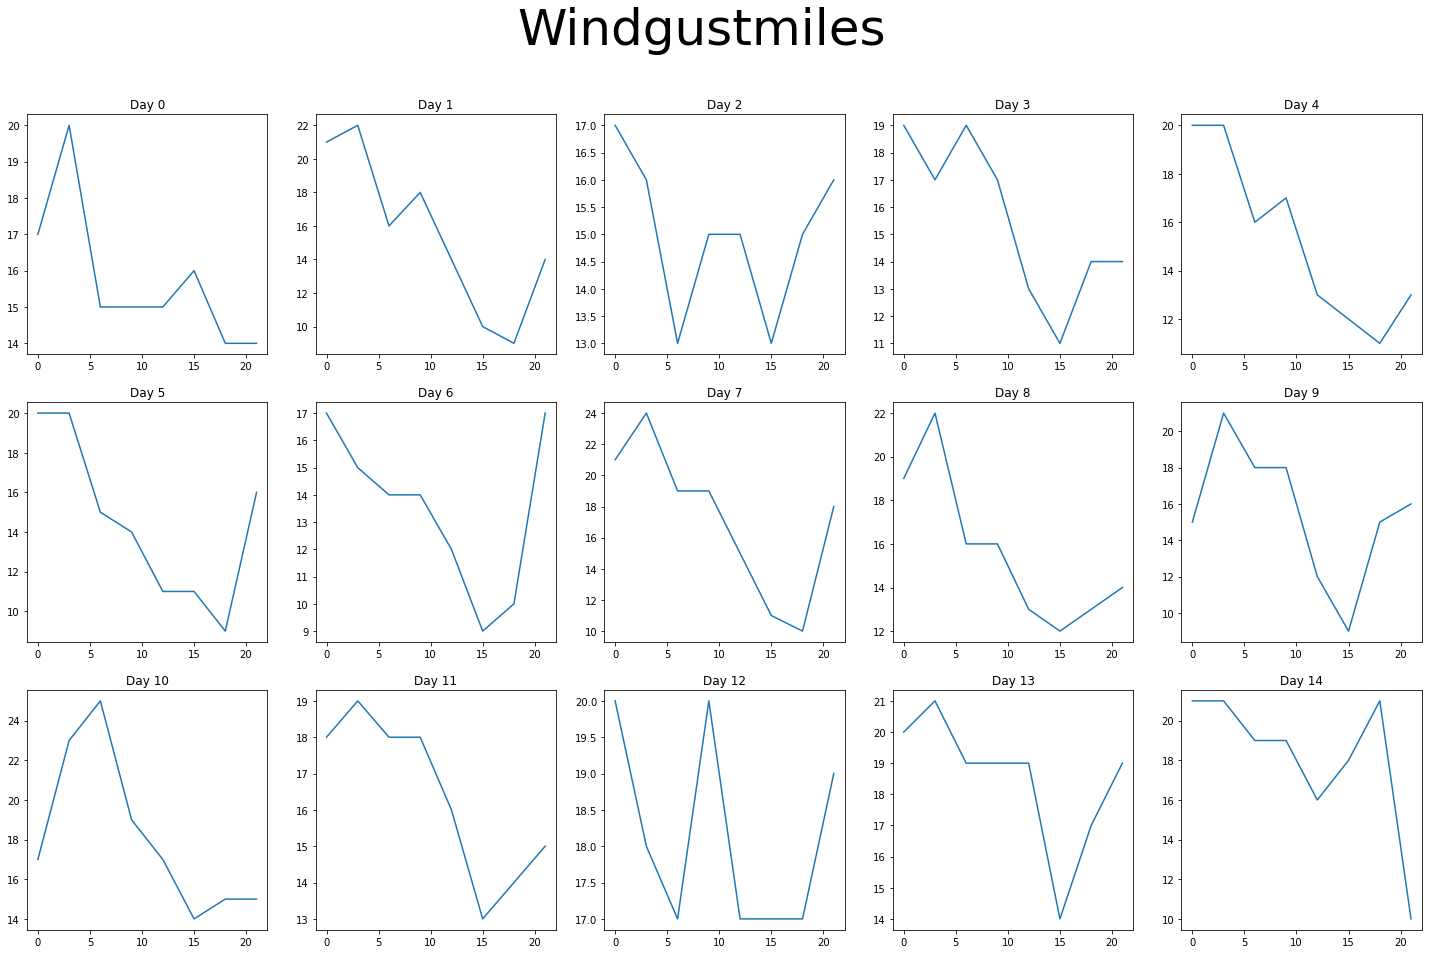

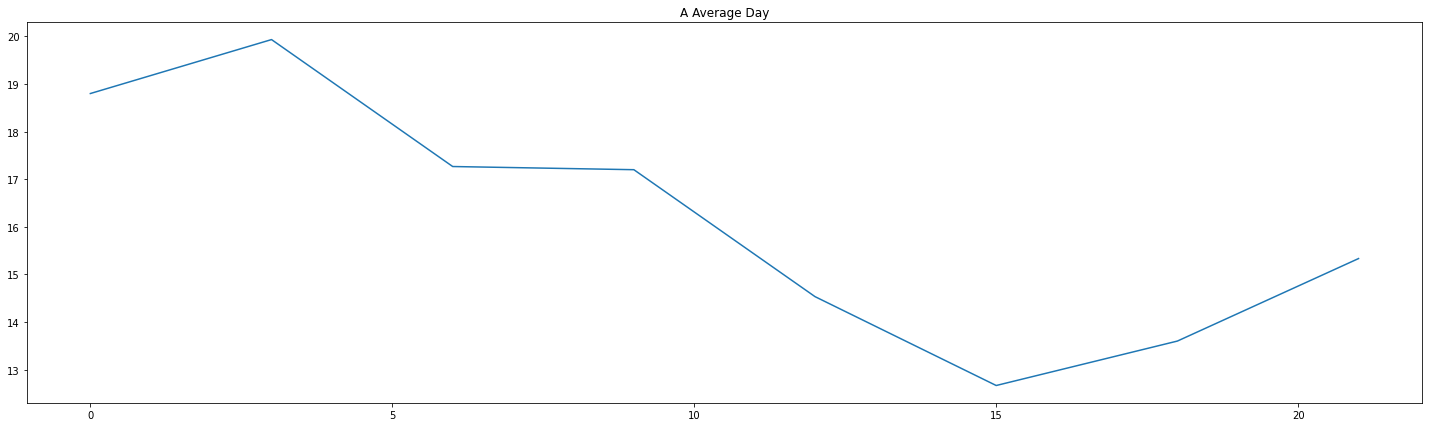

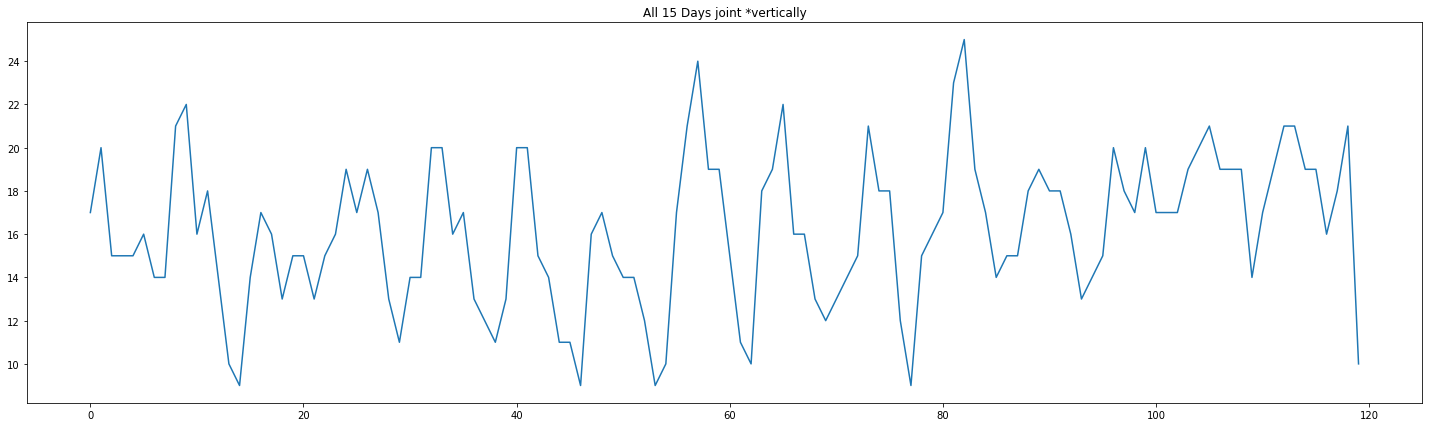


---



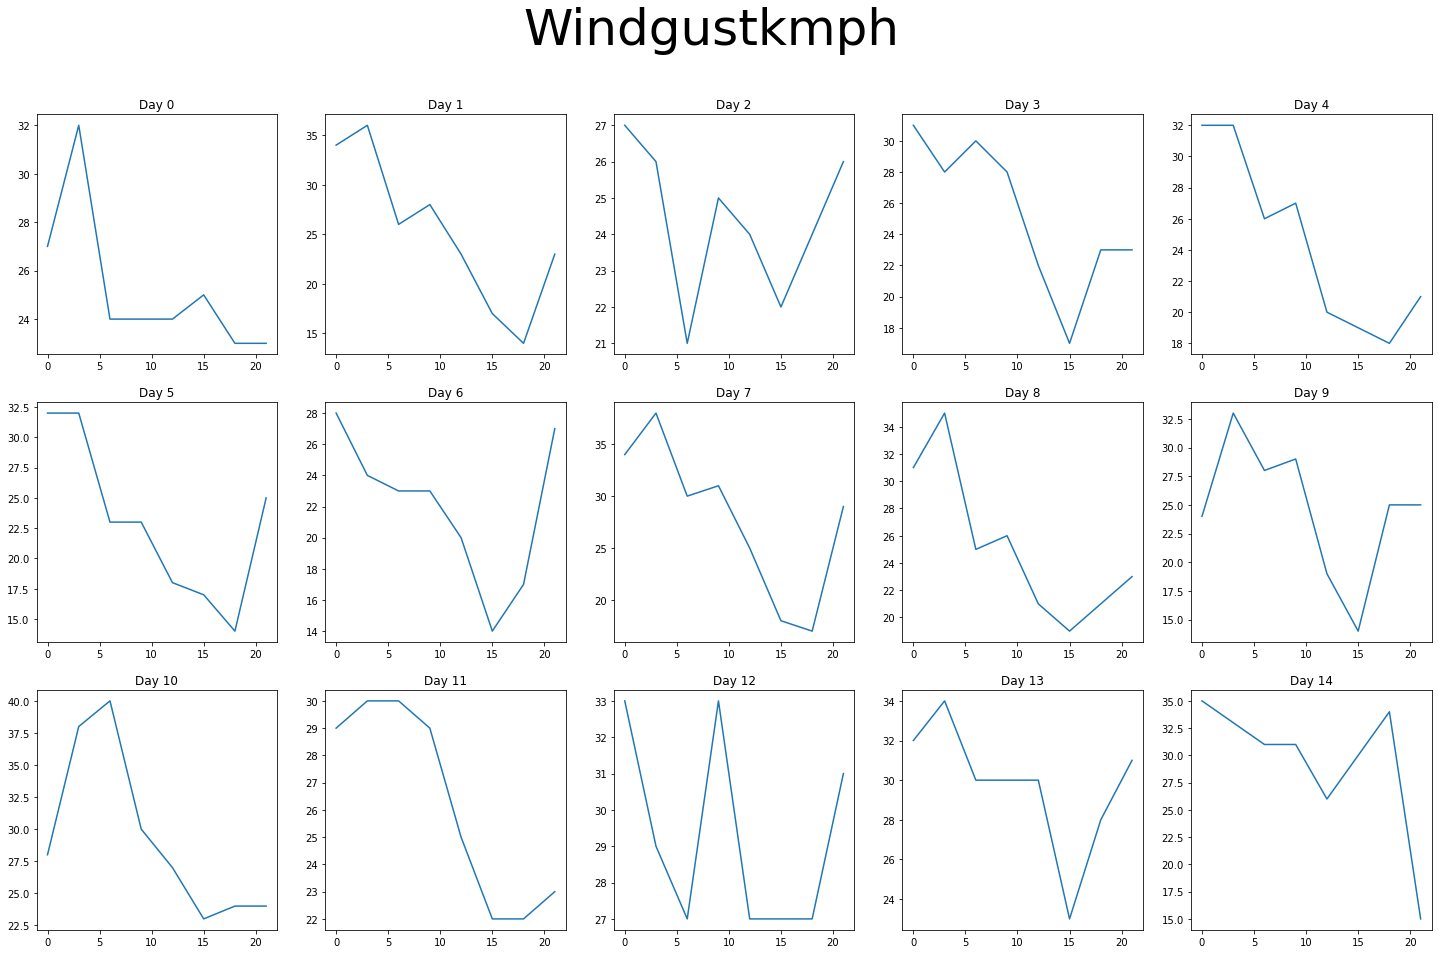

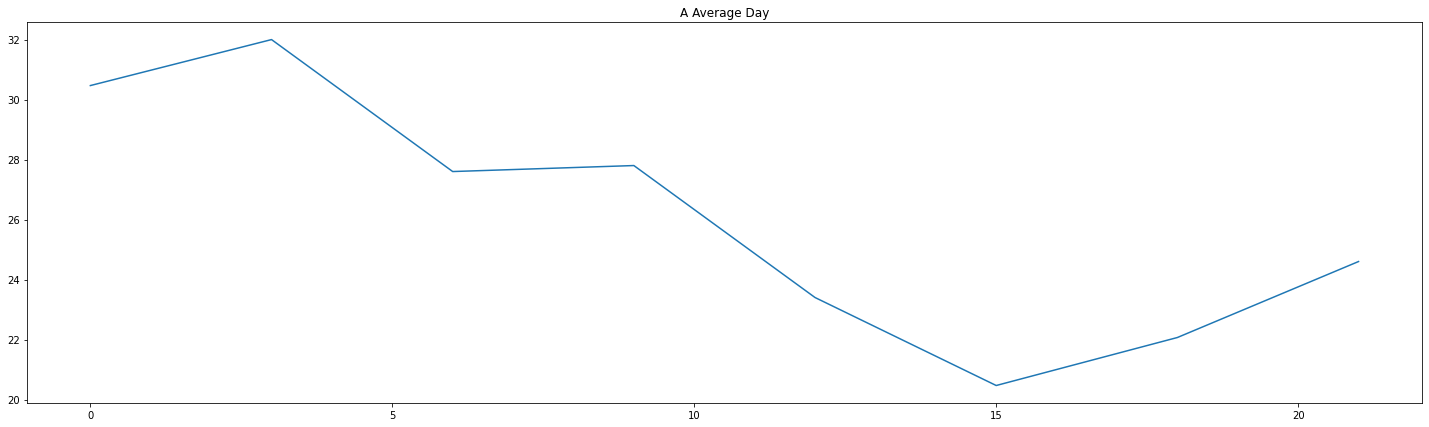

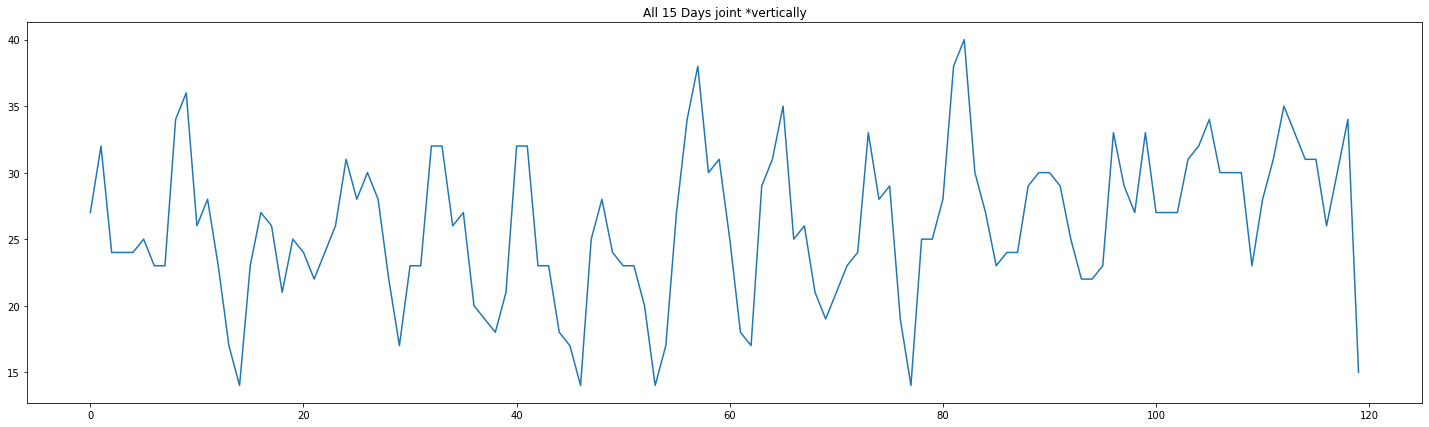


---



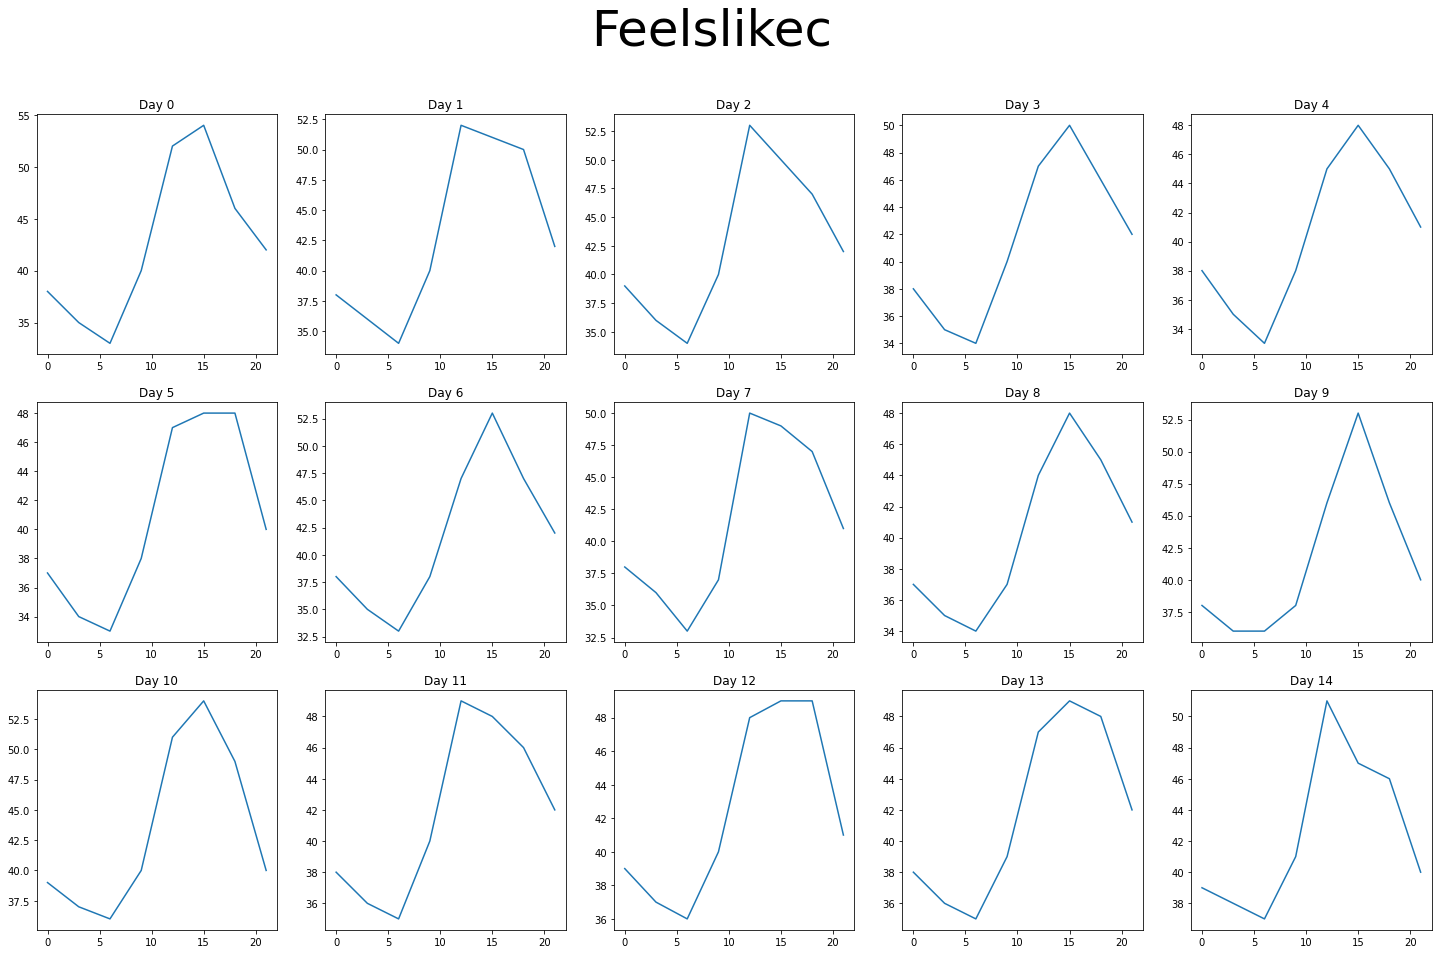

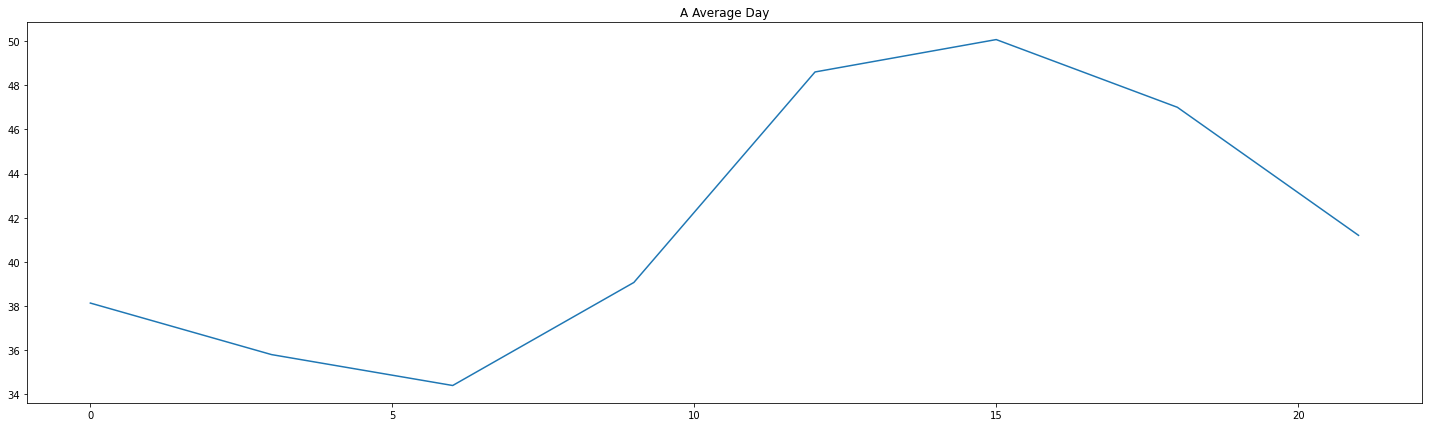

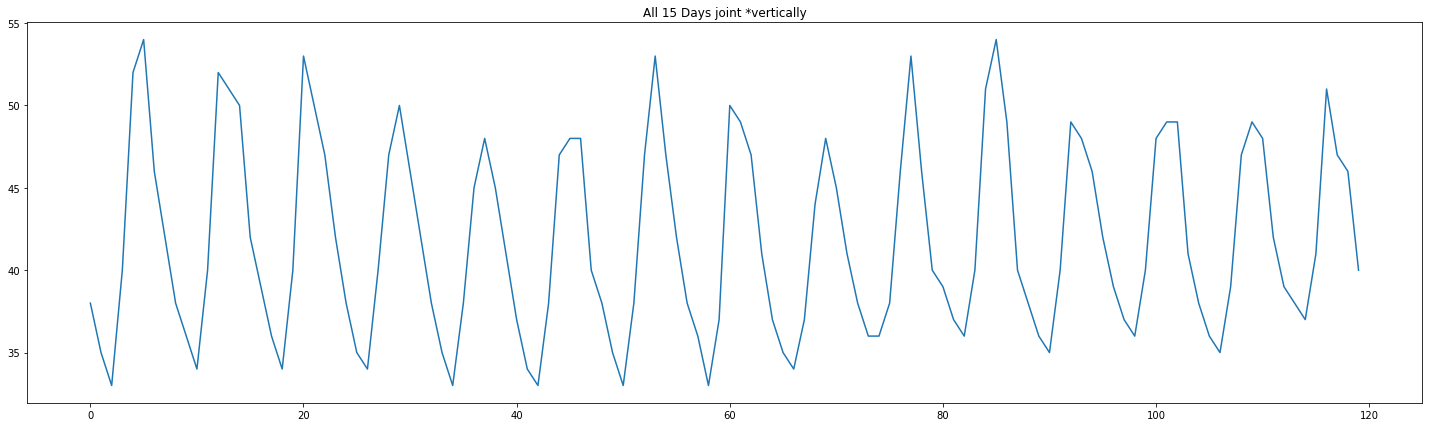


---



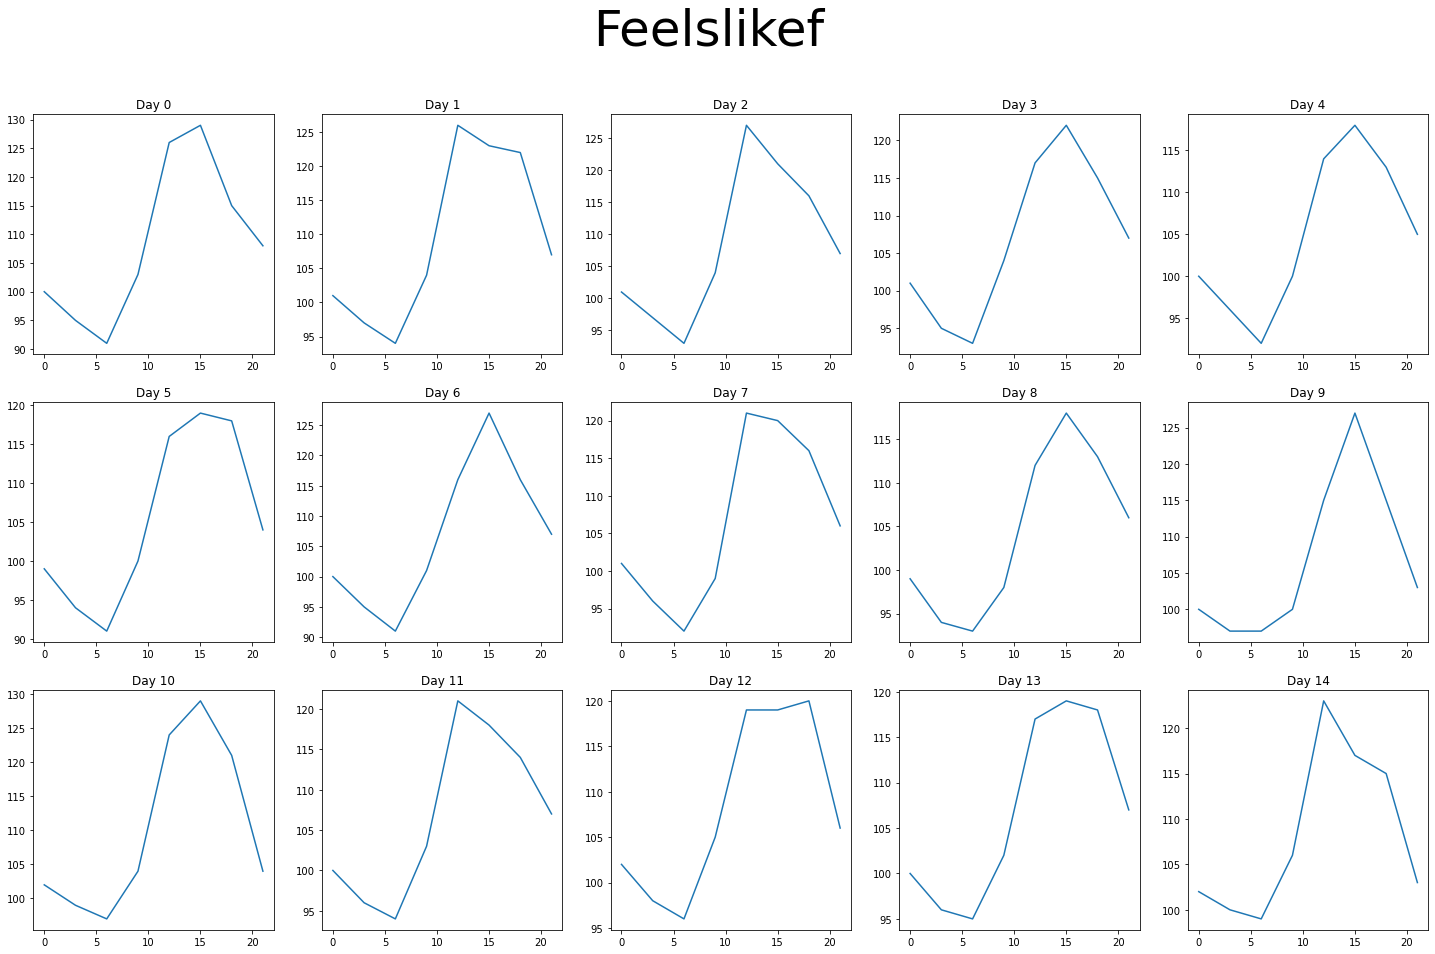

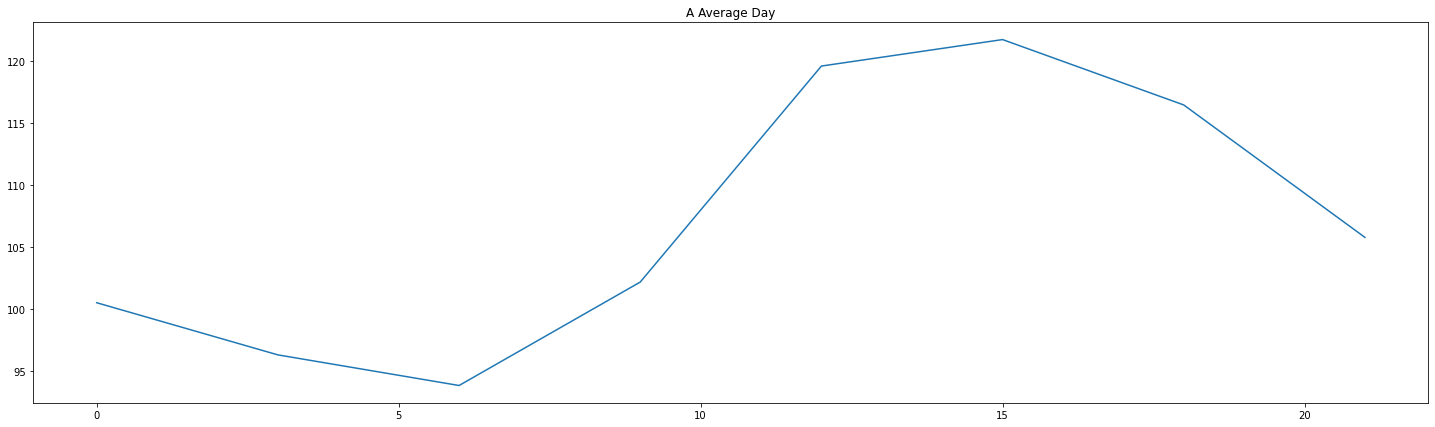

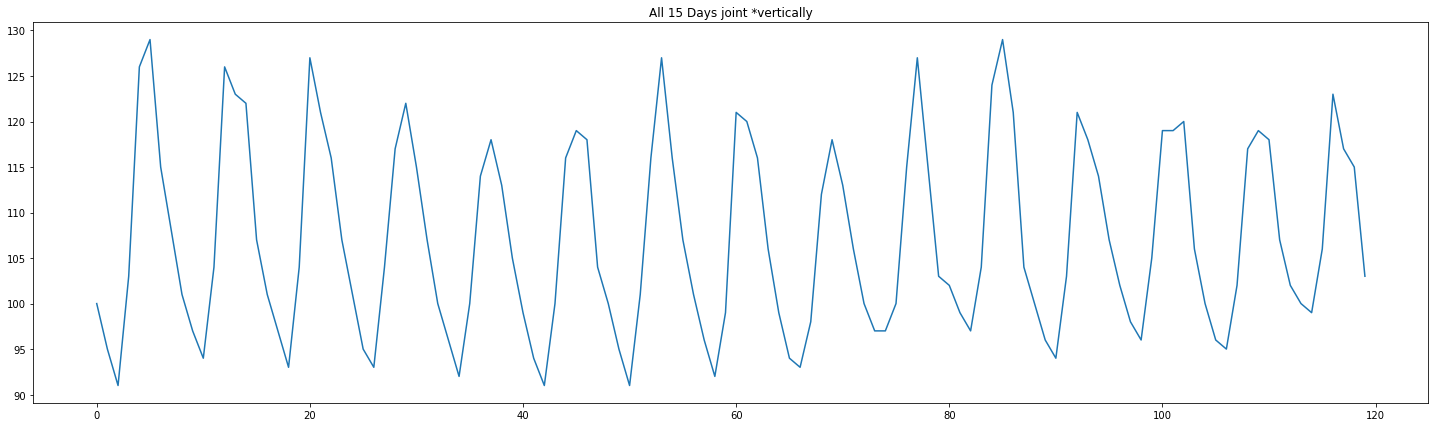


---



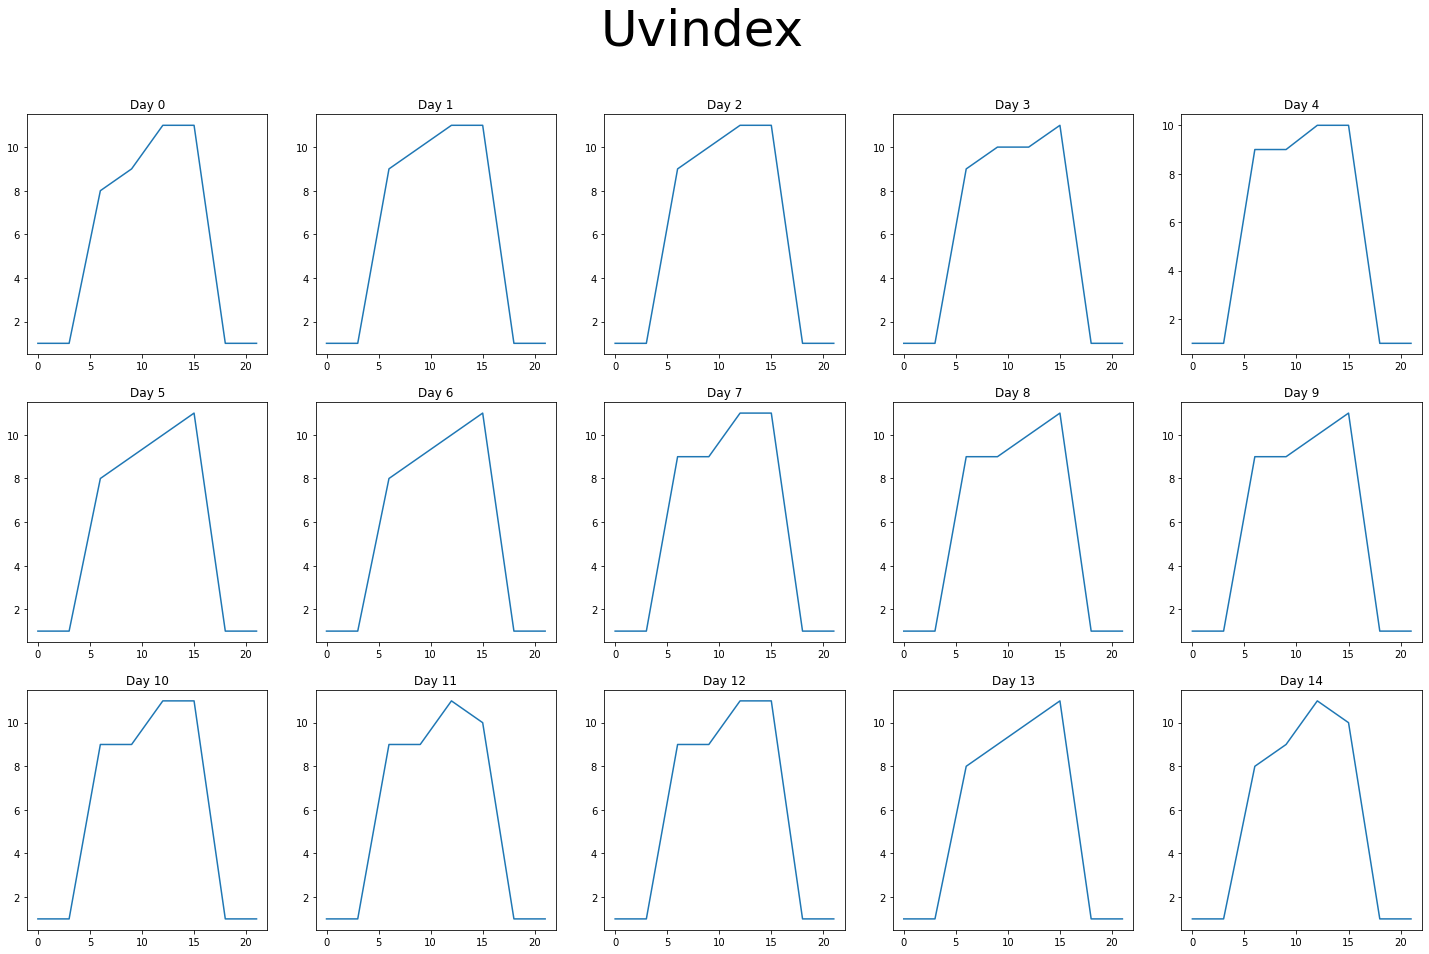

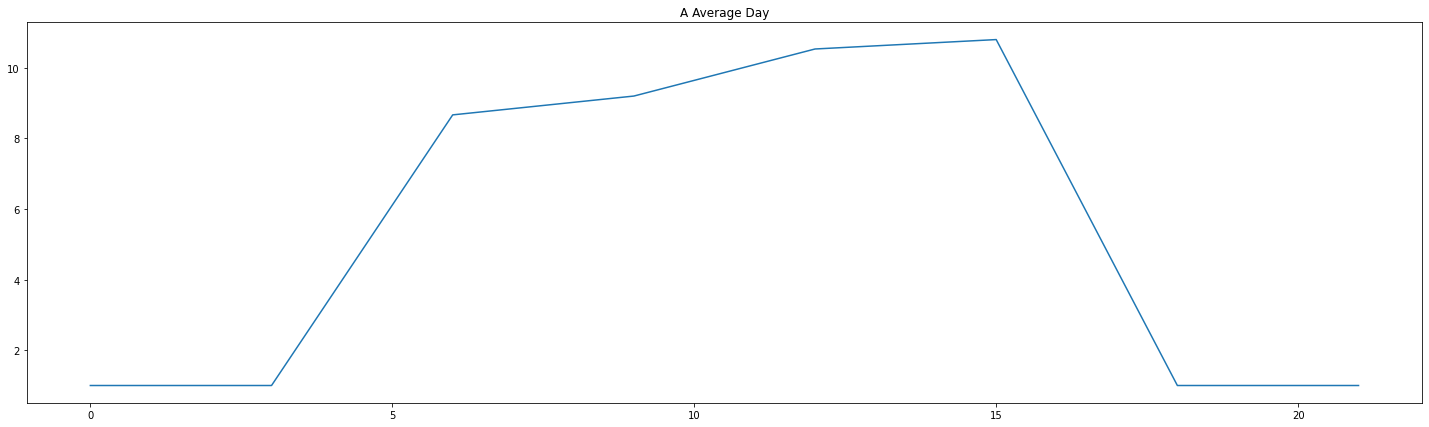

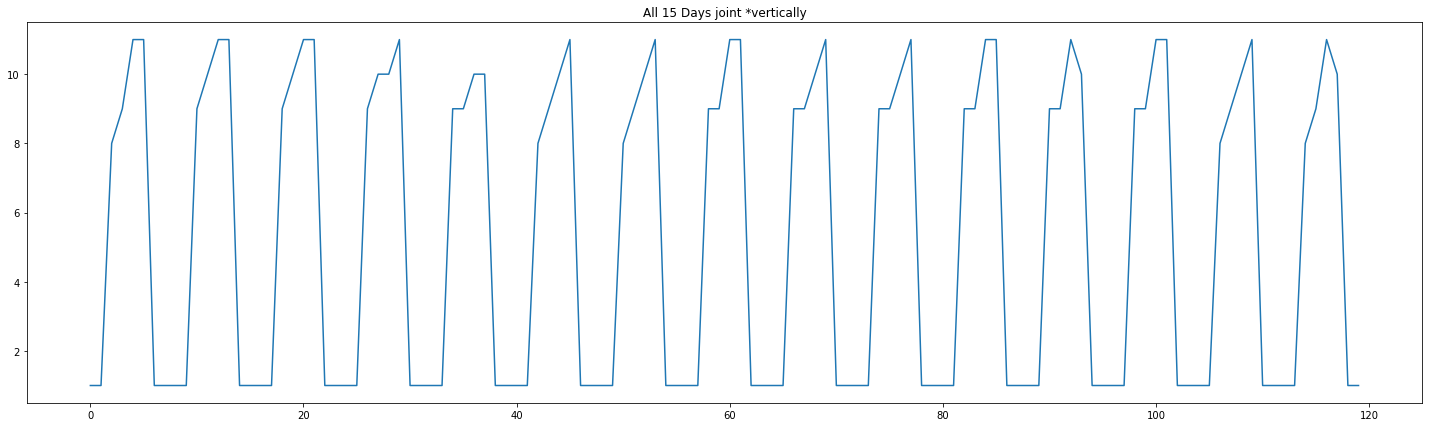


---



In [4]:
for quantity_name in hourly_quantities:
    plot_hourly(quantity_name)
    print('\n---\n')

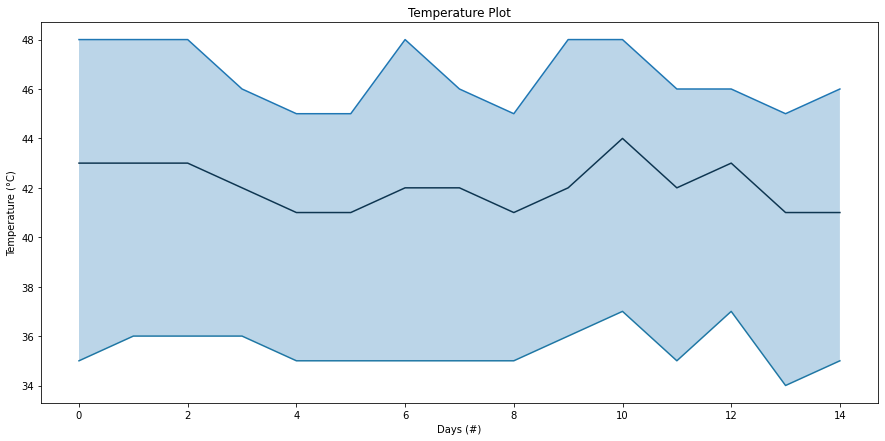

The upper and lower boundaries indicate maximum and minimum temperature reached
The darker line in mid indicates average temperature


In [5]:
plt.figure(figsize=(15, 7))
plt.fill_between(range(15), transposed_data['maxtempC'], transposed_data['mintempC'], alpha=0.3)
plt.plot(transposed_data['maxtempC'], color='#1f77b4', label='max temperature')
plt.plot(transposed_data['avgtempC'], color='#0e3651', label='avg temperature')
plt.plot(transposed_data['mintempC'], color='#1f77a4', label='min temperature')
plt.title("Temperature Plot")
plt.xlabel('Days (#)')
plt.ylabel('Temperature (°C)')
plt.show()

print("The upper and lower boundaries indicate maximum and minimum temperature reached")
print("The darker line in mid indicates average temperature")

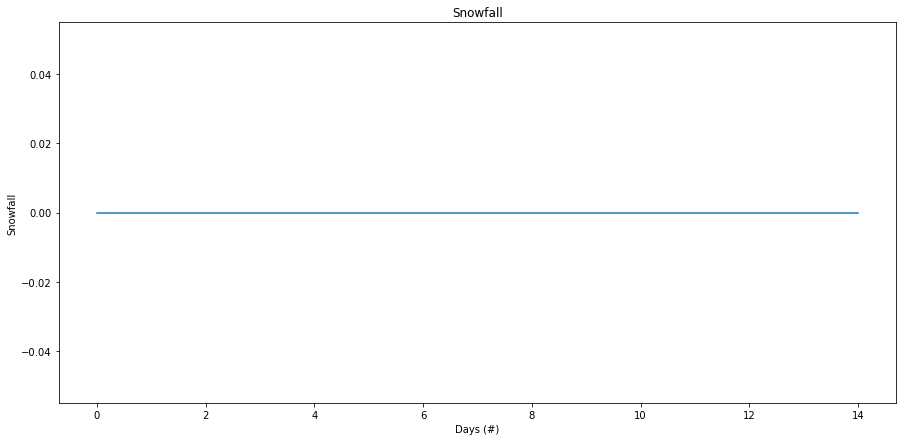

We can see there is no snowfall at all


In [6]:
plt.figure(figsize=(15, 7))
plt.title("Snowfall")
plt.ylabel("Snowfall")
plt.xlabel("Days (#)")
plt.plot(transposed_data['totalSnow_cm'])
plt.show()
print("We can see there is no snowfall at all")

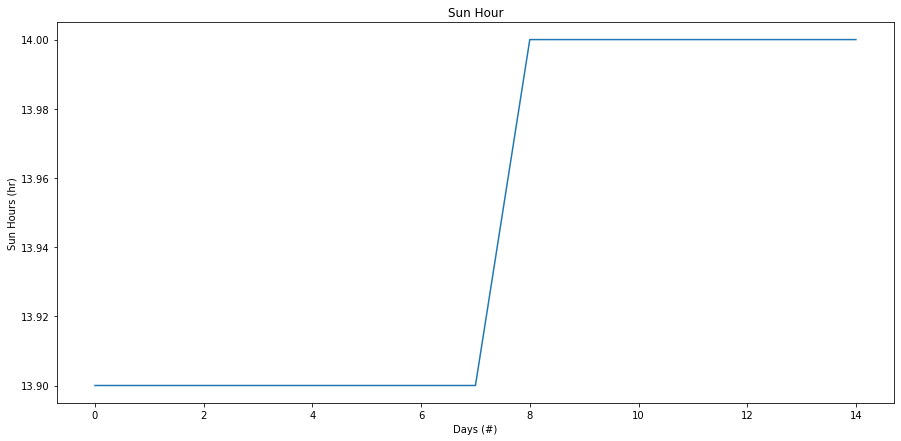

We can see sun hours are in upward trend


In [7]:
plt.figure(figsize=(15, 7))
plt.plot(transposed_data['sunHour'])
plt.title('Sun Hour')
plt.xlabel('Days (#)')
plt.ylabel('Sun Hours (hr)')
plt.show()

print("We can see sun hours are in upward trend")

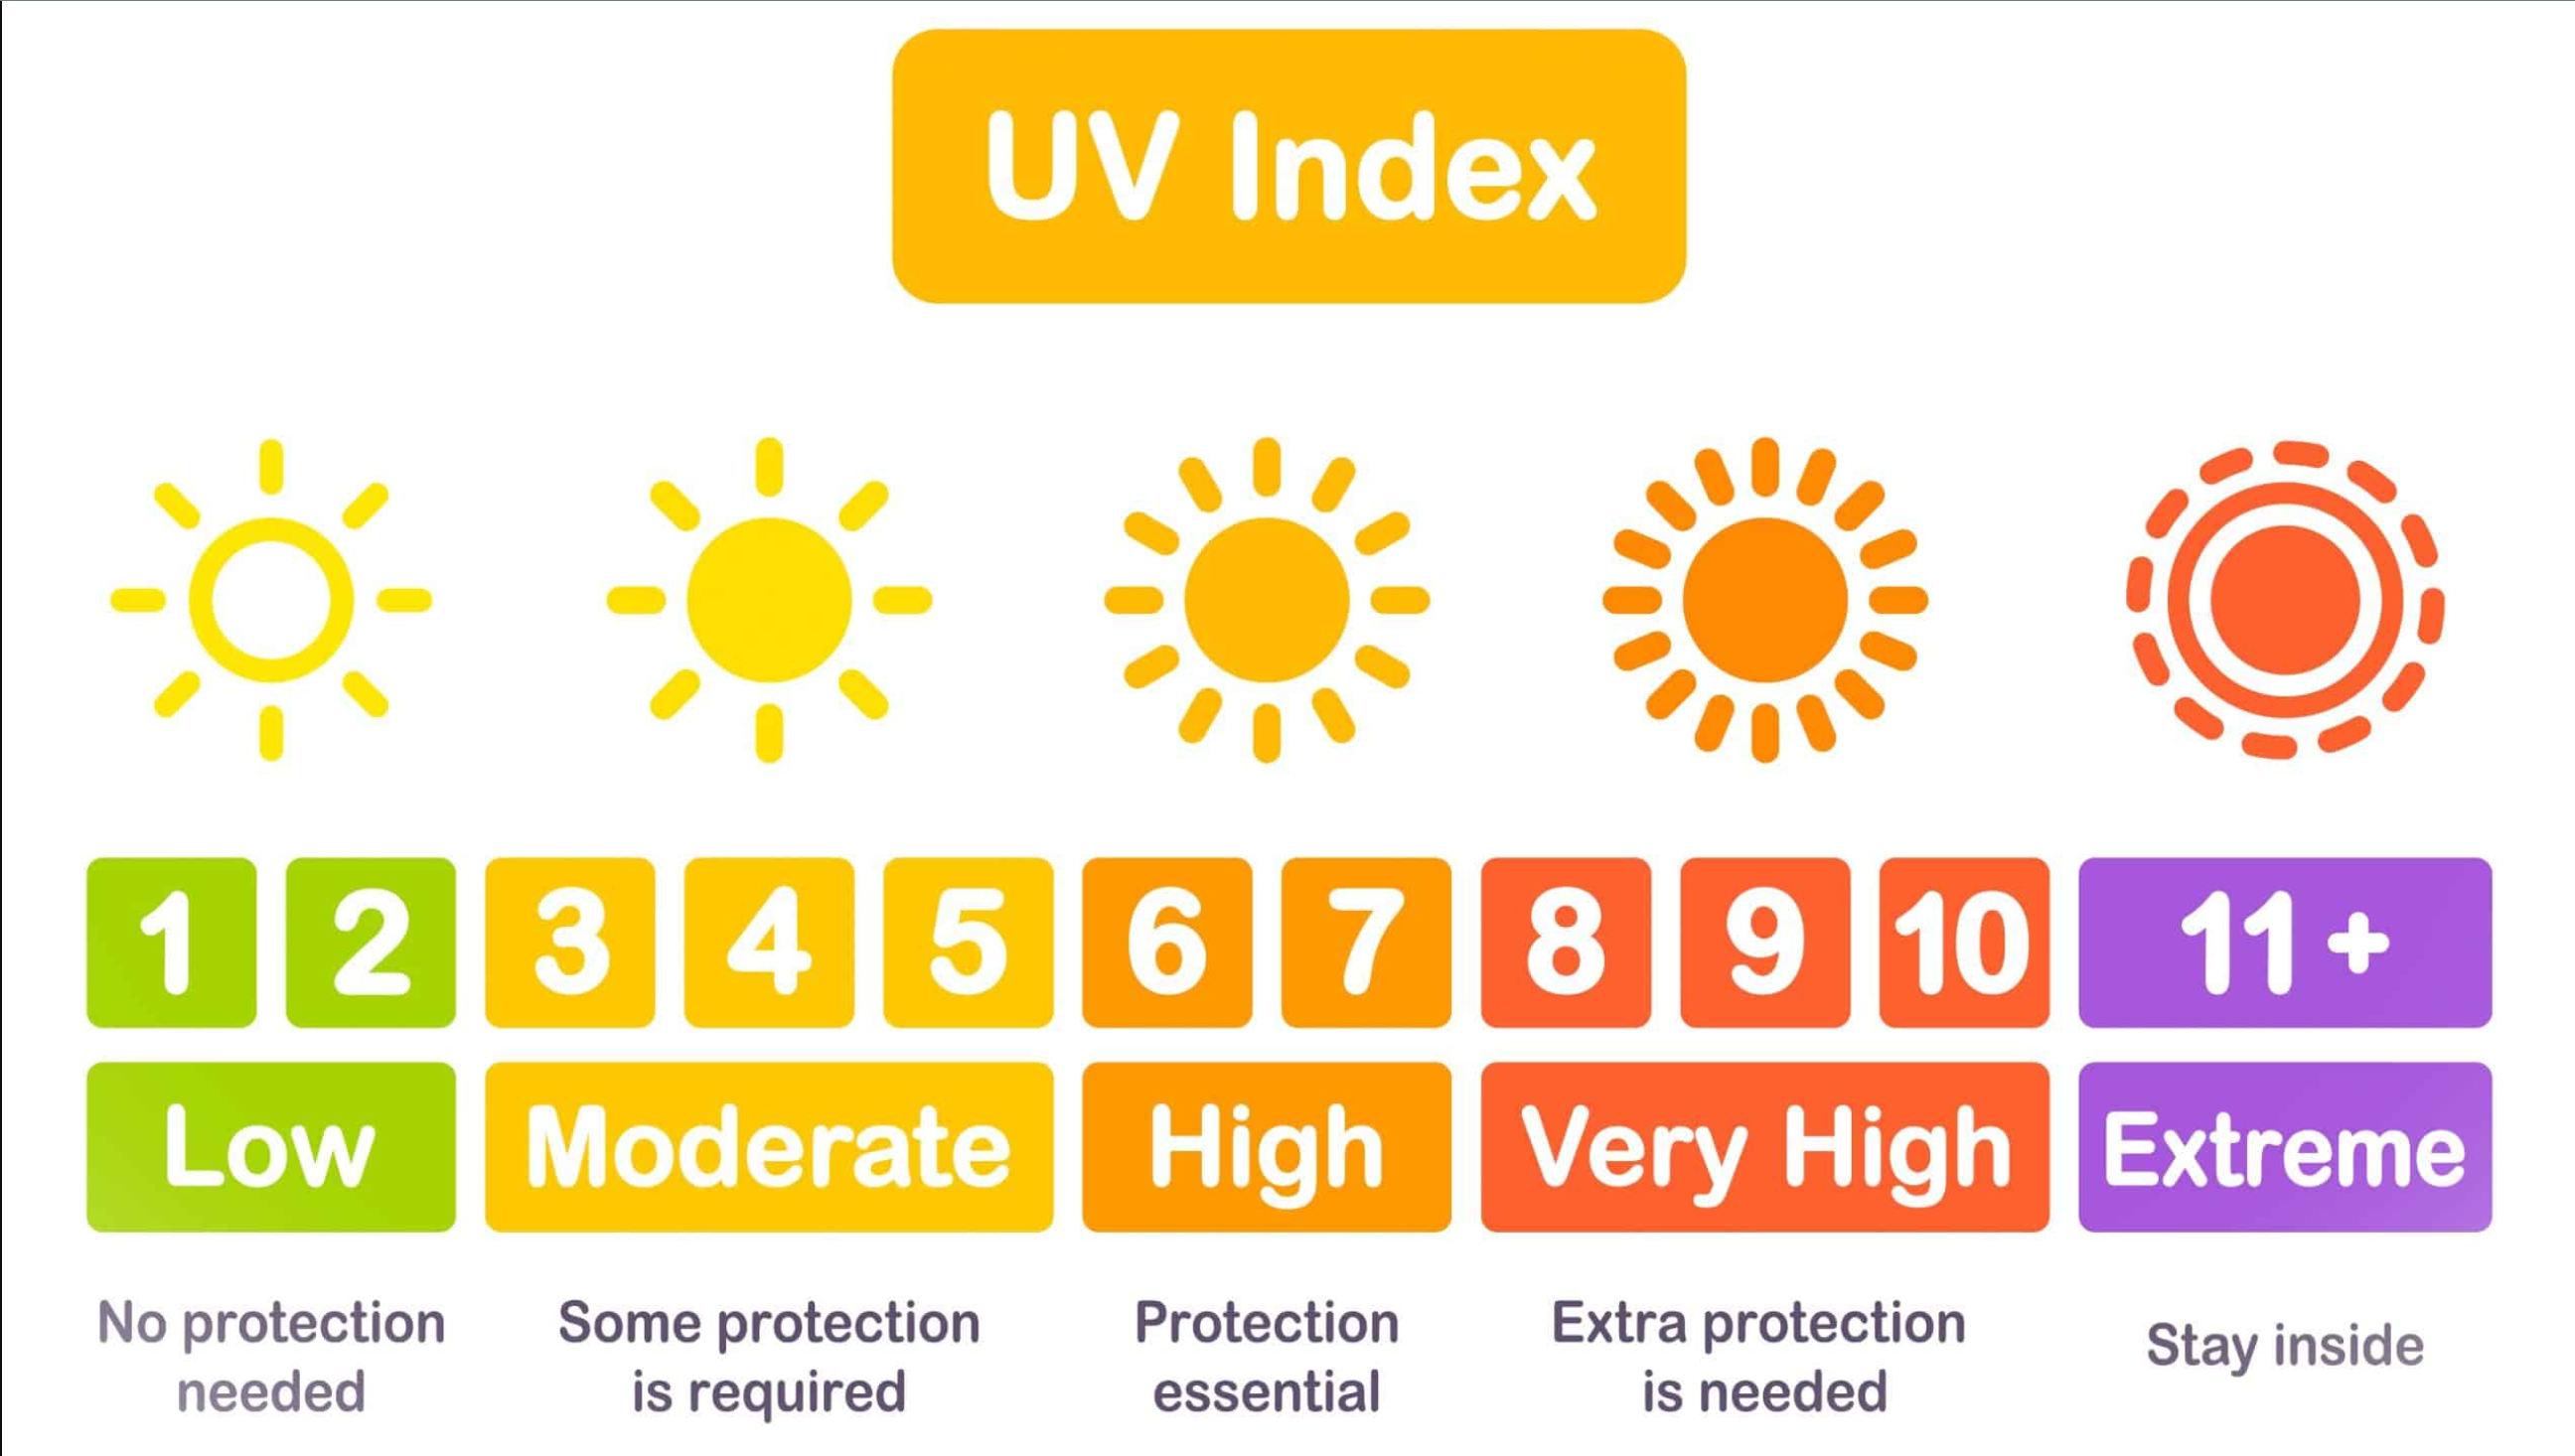

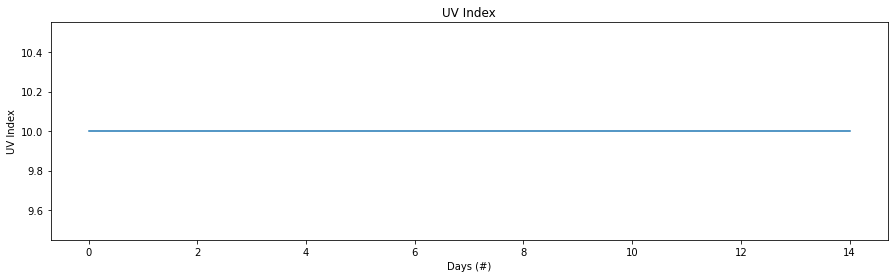

UV Index is very high


In [8]:
plt.figure(figsize=(15, 4))
plt.title("UV Index")
plt.ylabel('UV Index')
plt.xlabel('Days (#)')
plt.plot(transposed_data['uvIndex'])
plt.show()
print('UV Index is very high')

# Thank You 🙏